In [70]:
import numpy as np 
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import functions as myfunc
import myfunction as fo
import warnings
import os
import itertools
warnings.filterwarnings(action='ignore')

def save_pickle(data_name, data):
    with open(data_name, 'wb') as f:
        pickle.dump(data, f)
        
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/HANBatang.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)        

rawdata = pd.read_csv("2016_housemasterdata.csv" , encoding = 'CP949')

main_variable = ["MD제공용_가구고유번호", "수도권여부" , "가구주_성별코드", "가구주_교육정도_학력코드" , "가구주_만연령" , "가구원수","가구주_혼인상태코드" , "가구주_종사상지위코드", '경상소득(조사)', "경상소득_근로소득(조사)" , "경상소득_사업소득(조사)", "경상소득_재산소득(조사)" ,"경상소득_이전소득(조사)[공적이전소득+사적이전소득]" , "지출(조사)[비소비지출(조사)+소비지출(조사)](2012~2018년: 복지, 2019년~:공통)" ,
                 "지출_소비지출", "지출_소비지출_식료품(외식비포함)" ,"지출_소비지출_주거비", "지출_소비지출_교육비(보육료포함)", "지출_소비지출_의료비", "지출_소비지출_교통비", "지출_소비지출_통신비", "지출_소비지출_경조비및기타소비지출(2016년까지)" ,
                 "지출_비소비지출(조사)" , "지출_비소비지출_세금(조사)" , "지출_비소비지출_공적연금사회보험료(조사)" , "지출_비소비지출_가구간이전지출(조사)" , "지출_비소비지출_비영리단체이전지출(조사)" , "지출_비소비지출_연간지급이자(조사)"]

main_variable_ko = ["id", "수도권여부" , "가구주_성별코드", "교육정도", "만연령","가구원수" ,"혼인상태" ,
                    "가구주종사직업","총소득", "근로소득" , "사업소득", "재산소득" , "이전소득" , "총지출" ,
                    "소비지출", "식료품", "주거비", "교육비", "의료비", "교통비", "통신비", 
                    "기타소비" , "비소비지출" ,"세금" , "공적연금사회보험료" , "가구간이전지출" , "비영리단체이전지출" , "연간지급이자"]

main_variable_en = ["id", "metro", "sex", "edu", "age", "family_number" , "marital status" , 
                    "housemaster_job" , "income", "income_lab", "income_bis", "income_property", "income_trans", "all_consump" ,
                    "consump", "consump_food", "consump_house", "consump_edu", "consump_medi", "consump_transp", "consump_comm", 
                    "consump_others" , "nonconsump" ,"nonconsump_tax" , "nonconsump_pension" , "nonconsump_transfer" , "nonconsump_organization" , "nonconsump_interest"]

main_variable_en_consump = ["all_consump" ,"consump", "consump_food", "consump_house", "consump_edu", "consump_medi", 
                            "consump_transp", "consump_comm", "consump_others"]

dict_var = myfunc.make_dict(main_variable_en, main_variable_ko)
dict_sex = {'1':'M', '2':'F'}
dict_edu = {'1':'안받음', '2':'초등', '3': '중등', '4': '고등', '5':'대학', '6':'대학교', '7':'대학원'}
dict_marry = {'1' : '미혼' , '2' : '배우자있음' , '3' : '사별' , '4': '이혼'}
dict_housejob = {'1' : '상용근로자', '2' : '임시.일용근로자', '3' : '고용원이 있는 자영업자', '4' : '고용원이 없는 자영업자', '5' : '무급가족종사자', '6' : '기타 종사자(실적급의 보험설계사, 대리 운전기사, 학습지 방문 교사 등)', '7' : '기타(무직자, 가사, 학생 등)'}

dict_familynumber = {}
for i in range(1, 10):
    dict_familynumber[str(i)] = f'{i}명' # 범주형으로 표현하기 위해

all_oridata = rawdata.loc[rawdata['조사부문코드'] == "P", [ '조사부문코드'] + main_variable] # 복지부문 , 금융부문에서 복지부분만 추출하기 위해 
all_oridata.drop(columns=['조사부문코드'], inplace=True)
all_oridata.columns = main_variable_en

final_data = myfunc.convert_int(all_oridata, main_variable_en_consump) # 데이터 int형식으로 바꾸기 
final_data = myfunc.convert_int_to_str(final_data, ['sex', 'edu' ,'marital status', 'housemaster_job' , 'family_number']) # 해당 범주는 str형식으로 바꾸기 

myfunc.change_contents(final_data, 'sex', dict_sex)
myfunc.change_contents(final_data, 'edu', dict_edu)
myfunc.change_contents(final_data, 'marital status', dict_marry)
myfunc.change_contents(final_data, 'housemaster_job', dict_housejob)
myfunc.change_contents(final_data, 'family_number', dict_familynumber)

# final_data['metro'] = final_data['metro'].str.replace('G','')

,id,metro,sex,edu,age,family_number,marital status,housemaster_job,income,income_lab,...,consump_medi,consump_transp,consump_comm,consump_others,nonconsump,nonconsump_tax,nonconsump_pension,nonconsump_transfer,nonconsump_organization,nonconsump_interest
2,10200151,G1,F,대학교,53,3명,배우자있음,상용근로자,12600,12600,...,200,430,310,1300,1896,981,725,0,0,190
3,10200161,G1,M,대학,46,5명,배우자있음,고용원이 있는 자영업자,4560,0,...,36,120,240,380,1589,86,636,0,0,867
4,10200171,G1,M,대학교,36,2명,배우자있음,상용근로자,12420,12420,...,35,700,120,800,2759,515,818,200,136,1090
5,10200191,G1,F,안받음,80,1명,사별,임시.일용근로자,612,160,...,92,10,36,40,9,1,0,0,8,0
6,10200211,G2,M,대학,57,4명,배우자있음,고용원이 없는 자영업자,10800,0,...,100,36,480,230,1137,161,756,0,150,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18249,991600301,G2,M,안받음,86,1명,사별,"기타(무직자, 가사, 학생 등)",240,0,...,50,30,30,40,1,1,0,0,0,0
18269,994200381,G2,F,안받음,84,1명,사별,"기타(무직자, 가사, 학생 등)",288,0,...,30,20,10,10,11,1,10,0,0,0
18270,994505311,G2,M,대학,41,5명,배우자있음,상용근로자,4540,4500,...,200,400,240,500,593,82,331,0,0,180
18271,994505321,G2,M,초등,54,4명,배우자있음,상용근로자,2160,2160,...,0,100,72,300,1,1,0,0,0,0


In [124]:
final_data.to_csv("mostly_ai.data.csv")

In [65]:
from sdmetrics.single_column import KSComplement
from sdmetrics.column_pairs import CorrelationSimilarity
from sdmetrics.single_column import RangeCoverage
from sdmetrics.single_column import StatisticSimilarity
from sdmetrics.single_column import BoundaryAdherence
from sdmetrics.single_column import CSTest
from sdmetrics.single_table import NewRowSynthesis
from sdv.metadata import SingleTableMetadata # 싱글 메타 데이터의 경우에만! 멀티 메타 데이터의 경우에는 패키지를 다르게 불러와야함
from sdmetrics.reports.single_table import QualityReport 
from sdmetrics.reports.single_table import DiagnosticReport
from sdv.evaluation.single_table import evaluate_quality # Use this function to evaluate the quality of your synthetic data in terms of column shapes and correlations.
from sdv.evaluation.single_table import run_diagnostic # Check to see if the synthetic rows are pure copies of the real data
from sdv.evaluation.single_table import get_column_plot # Use this function to visualize a real column against the same synthetic column

In [17]:
import numpy as np 
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import functions as myfunc
import myfunction as fo
import warnings
import os
import itertools
warnings.filterwarnings(action='ignore')

def save_pickle(data_name, data):
    with open(data_name, 'wb') as f:
        pickle.dump(data, f)
        
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/HANBatang.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)        

rawdata = pd.read_csv("2016_housemasterdata.csv" , encoding = 'CP949')

main_variable = ["MD제공용_가구고유번호", "수도권여부" , "가구주_성별코드", "가구주_교육정도_학력코드" , "가구주_만연령" , "가구원수","가구주_혼인상태코드" , "가구주_종사상지위코드", '경상소득(조사)', "경상소득_근로소득(조사)" , "경상소득_사업소득(조사)", "경상소득_재산소득(조사)" ,"경상소득_이전소득(조사)[공적이전소득+사적이전소득]" , "지출(조사)[비소비지출(조사)+소비지출(조사)](2012~2018년: 복지, 2019년~:공통)" ,
                 "지출_소비지출", "지출_소비지출_식료품(외식비포함)" ,"지출_소비지출_주거비", "지출_소비지출_교육비(보육료포함)", "지출_소비지출_의료비", "지출_소비지출_교통비", "지출_소비지출_통신비", "지출_소비지출_경조비및기타소비지출(2016년까지)" ,
                 "지출_비소비지출(조사)" , "지출_비소비지출_세금(조사)" , "지출_비소비지출_공적연금사회보험료(조사)" , "지출_비소비지출_가구간이전지출(조사)" , "지출_비소비지출_비영리단체이전지출(조사)" , "지출_비소비지출_연간지급이자(조사)"]

main_variable_ko = ["id", "수도권여부" , "가구주_성별코드", "교육정도", "만연령","가구원수" ,"혼인상태" ,
                    "가구주종사직업","총소득", "근로소득" , "사업소득", "재산소득" , "이전소득" , "총지출" ,
                    "소비지출", "식료품", "주거비", "교육비", "의료비", "교통비", "통신비", 
                    "기타소비" , "비소비지출" ,"세금" , "공적연금사회보험료" , "가구간이전지출" , "비영리단체이전지출" , "연간지급이자"]

main_variable_en = ["id", "metro", "sex", "edu", "age", "family_number" , "marital status" , 
                    "housemaster_job" , "income", "income_lab", "income_bis", "income_property", "income_trans", "all_consump" ,
                    "consump", "consump_food", "consump_house", "consump_edu", "consump_medi", "consump_transp", "consump_comm", 
                    "consump_others" , "nonconsump" ,"nonconsump_tax" , "nonconsump_pension" , "nonconsump_transfer" , "nonconsump_organization" , "nonconsump_interest"]

main_variable_en_consump = ["all_consump" ,"consump", "consump_food", "consump_house", "consump_edu", "consump_medi", 
                            "consump_transp", "consump_comm", "consump_others"]

# 시나리오 csv 불러오기

In [39]:
path = "C:/Users/2jjsj/OneDrive/바탕 화면/article/dataframe/"

In [40]:
scenario1 = pd.read_csv(path + "scenario1.csv")
scenario2_less_zero = pd.read_csv(path + "scenario2_less_syn_data.csv")
scenario3_less_zero = pd.read_csv(path + "scenario3_less.csv")

In [18]:
all_oridata = rawdata.loc[rawdata['조사부문코드'] == "P", [ '조사부문코드'] + main_variable] # 복지부문 , 금융부문에서 복지부분만 추출하기 위해 
all_oridata.drop(columns=['조사부문코드'], inplace=True)
all_oridata.columns = main_variable_en

final_data = myfunc.convert_int(all_oridata, main_variable_en_consump) # 데이터 int형식으로 바꾸기 
final_data = myfunc.convert_int_to_str(final_data, ['sex', 'edu' ,'marital status', 'housemaster_job' , 'family_number']) # 해당 범주는 str형식으로 바꾸기 

In [19]:
final_data

,id,metro,sex,edu,age,family_number,marital status,housemaster_job,income,income_lab,...,consump_medi,consump_transp,consump_comm,consump_others,nonconsump,nonconsump_tax,nonconsump_pension,nonconsump_transfer,nonconsump_organization,nonconsump_interest
2,10200151,G1,2,6,53,3,2,1,12600,12600,...,200,430,310,1300,1896,981,725,0,0,190
3,10200161,G1,1,5,46,5,2,3,4560,0,...,36,120,240,380,1589,86,636,0,0,867
4,10200171,G1,1,6,36,2,2,1,12420,12420,...,35,700,120,800,2759,515,818,200,136,1090
5,10200191,G1,2,1,80,1,3,2,612,160,...,92,10,36,40,9,1,0,0,8,0
6,10200211,G2,1,5,57,4,2,4,10800,0,...,100,36,480,230,1137,161,756,0,150,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18249,991600301,G2,1,1,86,1,3,7,240,0,...,50,30,30,40,1,1,0,0,0,0
18269,994200381,G2,2,1,84,1,3,7,288,0,...,30,20,10,10,11,1,10,0,0,0
18270,994505311,G2,1,5,41,5,2,1,4540,4500,...,200,400,240,500,593,82,331,0,0,180
18271,994505321,G2,1,2,54,4,2,1,2160,2160,...,0,100,72,300,1,1,0,0,0,0


In [21]:
final_data.to_csv("numeric_final_data.csv" , index = False)

In [28]:
scenario1_change = scenario1.copy()
scenario2_change = scenario2_less_zero.copy()
scenario3_change = scenario3_less_zero.copy()

In [29]:
dict_sex = {'M':'1', 'F':'2'}
dict_edu = {'안받음':'1', '초등':'2', '중등':'3' , '고등':'4', '대학':'5', '대학교':'6', '대학원':'7'}
dict_marry = {'미혼':'1' , '배우자있음':'2' , '사별':'3' ,'이혼' : '4'}
dict_housejob = {'상용근로자' :'1' , '임시.일용근로자':'2' , '고용원이 있는 자영업자':'3' , '고용원이 없는 자영업자':'4' , '무급가족종사자':'5' ,'기타 종사자(실적급의 보험설계사, 대리 운전기사, 학습지 방문 교사 등)':'6', '기타(무직자, 가사, 학생 등)':'7' }

myfunc.change_contents(scenario1_change, 'sex', dict_sex)
myfunc.change_contents(scenario1_change, 'edu', dict_edu)
myfunc.change_contents(scenario1_change, 'marital status', dict_marry)
myfunc.change_contents(scenario1_change, 'housemaster_job', dict_housejob)

,id,metro,sex,edu,age,family_number,marital status,housemaster_job,income,income_lab,...,consump_medi,consump_transp,consump_comm,consump_others,nonconsump,nonconsump_tax,nonconsump_pension,nonconsump_transfer,nonconsump_organization,nonconsump_interest
0,868292029,G2,1,4,46,2명,2,7,2523,2778,...,287,468,131,288,599,32,384,0,31,0
1,538756664,G2,1,6,36,3명,2,1,9666,6041,...,28,361,172,457,796,85,335,343,197,199
2,906175918,G1,1,3,52,4명,2,4,13313,2391,...,430,233,141,99,751,54,79,0,0,26
3,245718990,G2,2,1,82,1명,3,7,62,6,...,0,0,12,0,8,41,7,1,2,8
4,866521624,G2,1,4,74,4명,2,1,5829,109,...,668,354,279,546,1422,1849,654,1,221,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9092,582999499,G1,2,3,48,1명,3,7,1033,4157,...,91,27,43,1617,570,19,488,2,0,0
9093,222364923,G2,1,3,80,5명,2,7,7810,8785,...,286,291,195,430,3401,1608,493,0,183,0
9094,10200151,G1,2,2,51,1명,3,2,2074,1805,...,25,8,39,70,821,7,40,0,0,281
9095,114953404,G2,1,5,54,2명,4,2,3209,644,...,9,396,139,324,396,41,6,51,41,220


In [30]:
myfunc.change_contents(scenario2_change, 'sex', dict_sex)
myfunc.change_contents(scenario2_change, 'edu', dict_edu)
myfunc.change_contents(scenario2_change, 'marital status', dict_marry)
myfunc.change_contents(scenario2_change, 'housemaster_job', dict_housejob)
myfunc.change_contents(scenario3_change, 'sex', dict_sex)
myfunc.change_contents(scenario3_change, 'edu', dict_edu)
myfunc.change_contents(scenario3_change, 'marital status', dict_marry)
myfunc.change_contents(scenario3_change, 'housemaster_job', dict_housejob)

,id,metro,sex,edu,age,family_number,marital status,housemaster_job,income,income_lab,...,consump_medi,consump_transp,consump_comm,consump_others,nonconsump,nonconsump_tax,nonconsump_pension,nonconsump_transfer,nonconsump_organization,nonconsump_interest
0,741201391,G2,1,1,80,2명,2,4,442,0,...,100,20,0,30,24,0,0,0,24,0
1,817200291,G2,2,1,82,1명,3,7,542,0,...,0,0,0,0,1,1,0,0,0,0
2,864504381,G2,2,3,72,1명,3,7,742,0,...,30,20,16,110,297,28,0,0,50,219
3,249700815,G2,2,1,64,1명,2,7,851,0,...,0,20,1,9,23,0,0,0,0,0
4,18201391,G2,2,5,76,2명,3,7,1063,0,...,0,12,0,54,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9092,222352979,G2,1,4,69,3명,2,7,3300,2073,...,107,38,107,145,636,45,127,0,0,164
9093,859282310,G2,1,6,47,4명,2,1,6594,8345,...,188,368,198,1001,1229,435,438,187,138,1530
9094,126096085,G1,1,6,38,4명,2,1,5939,7099,...,22,340,182,1202,268,596,409,191,65,0
9095,208253084,G2,1,5,32,4명,2,1,5724,7024,...,26,200,134,420,1412,31,516,191,0,261


In [31]:
scenario1_change['family_number'] = scenario1_change['family_number'].str.replace('명','')
scenario2_change['family_number'] = scenario2_change['family_number'].str.replace('명','')
scenario3_change['family_number'] = scenario3_change['family_number'].str.replace('명','')

In [93]:
scenario1_change.to_csv("scenario1_change.csv" , index= False)
scenario2_change.to_csv("scenario2_change.csv" , index= False)
scenario3_change.to_csv("scenario3_change.csv" , index= False)

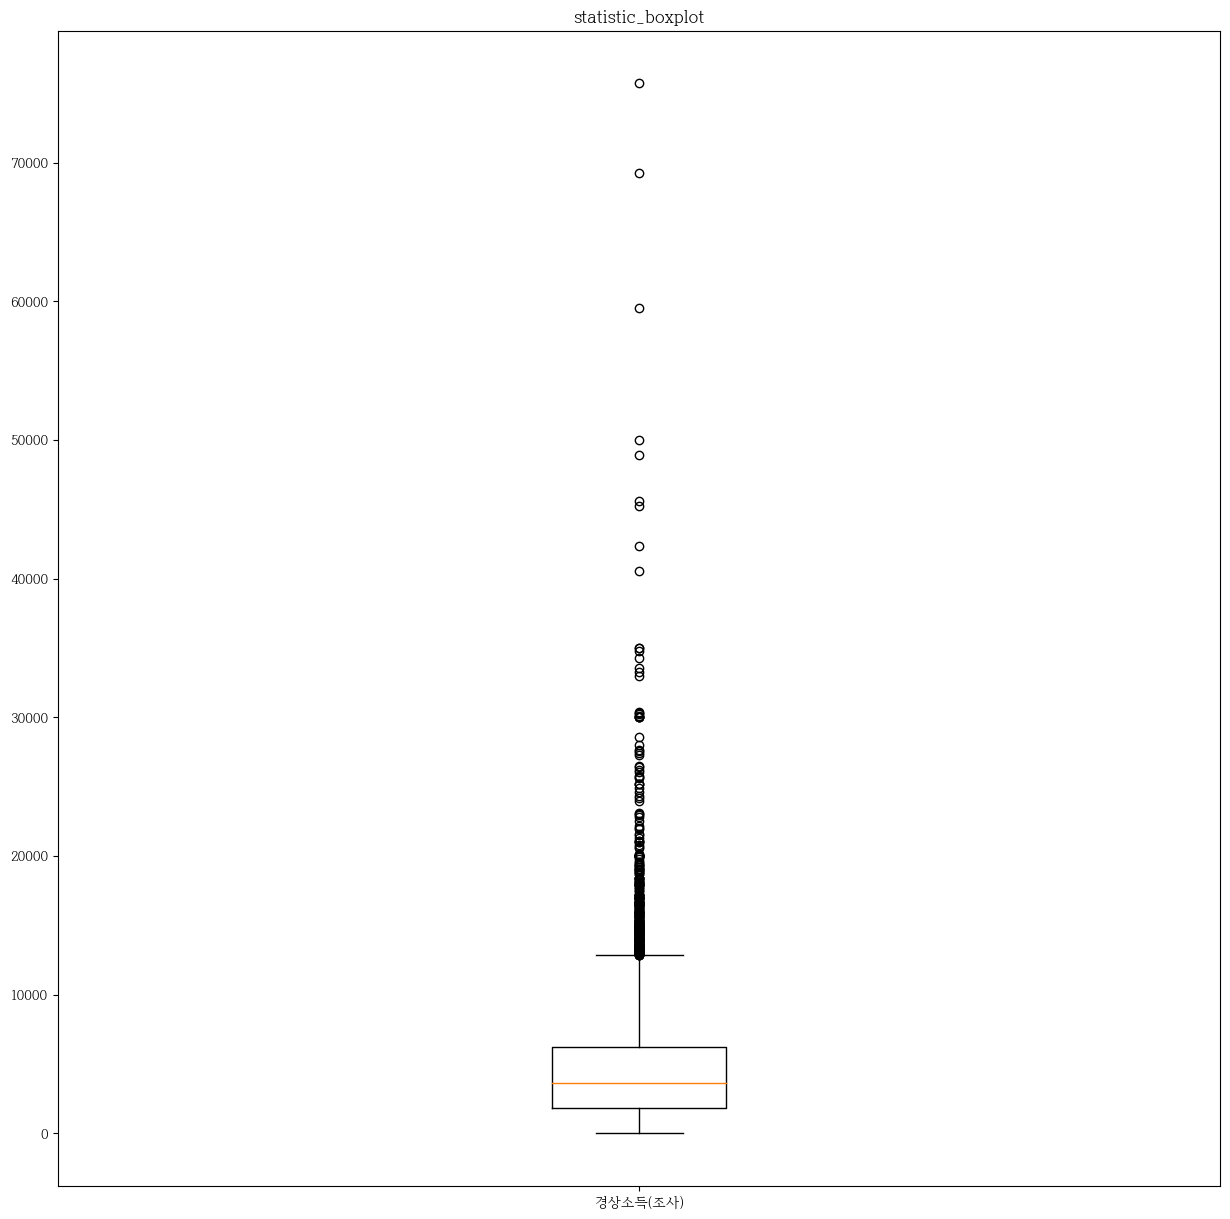

In [30]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.size'] = 10
plt.boxplot(final_data['income'])
plt.xticks([1] , ['경상소득(조사)'])
plt.title('statistic_boxplot')  
plt.savefig('income_boxplot')
plt.show()

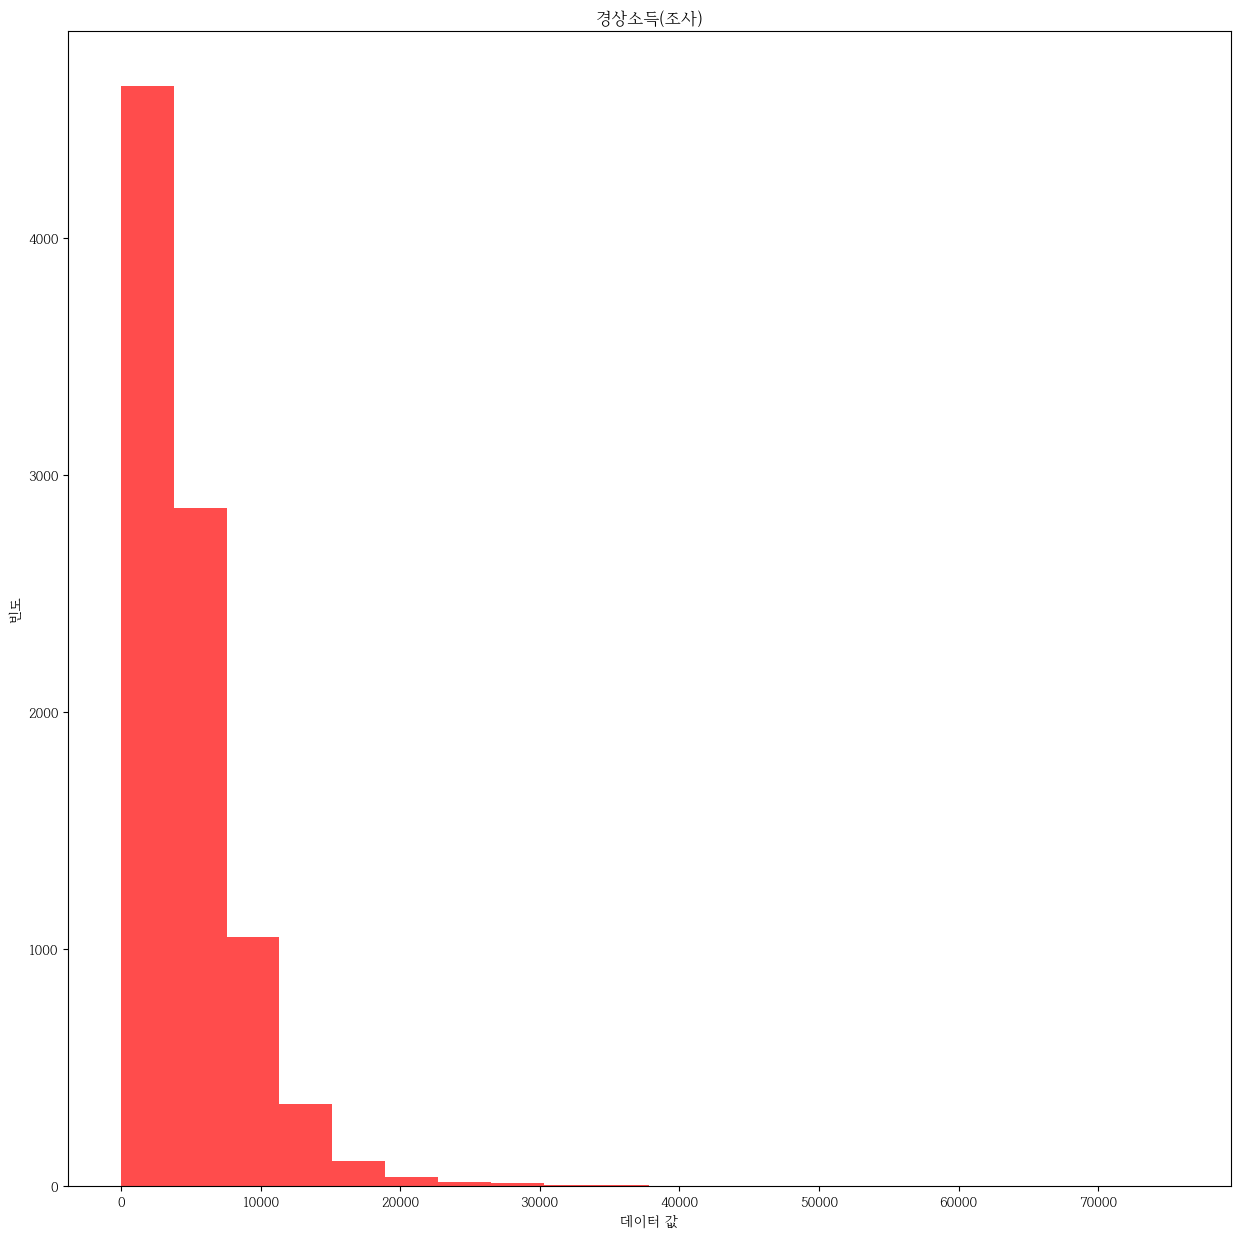

In [31]:
plt.hist(final_data['income'], bins=20, color='red', alpha=0.7)
plt.title('경상소득(조사)')
plt.xlabel('데이터 값')
plt.ylabel('빈도')
plt.savefig('income_hist')

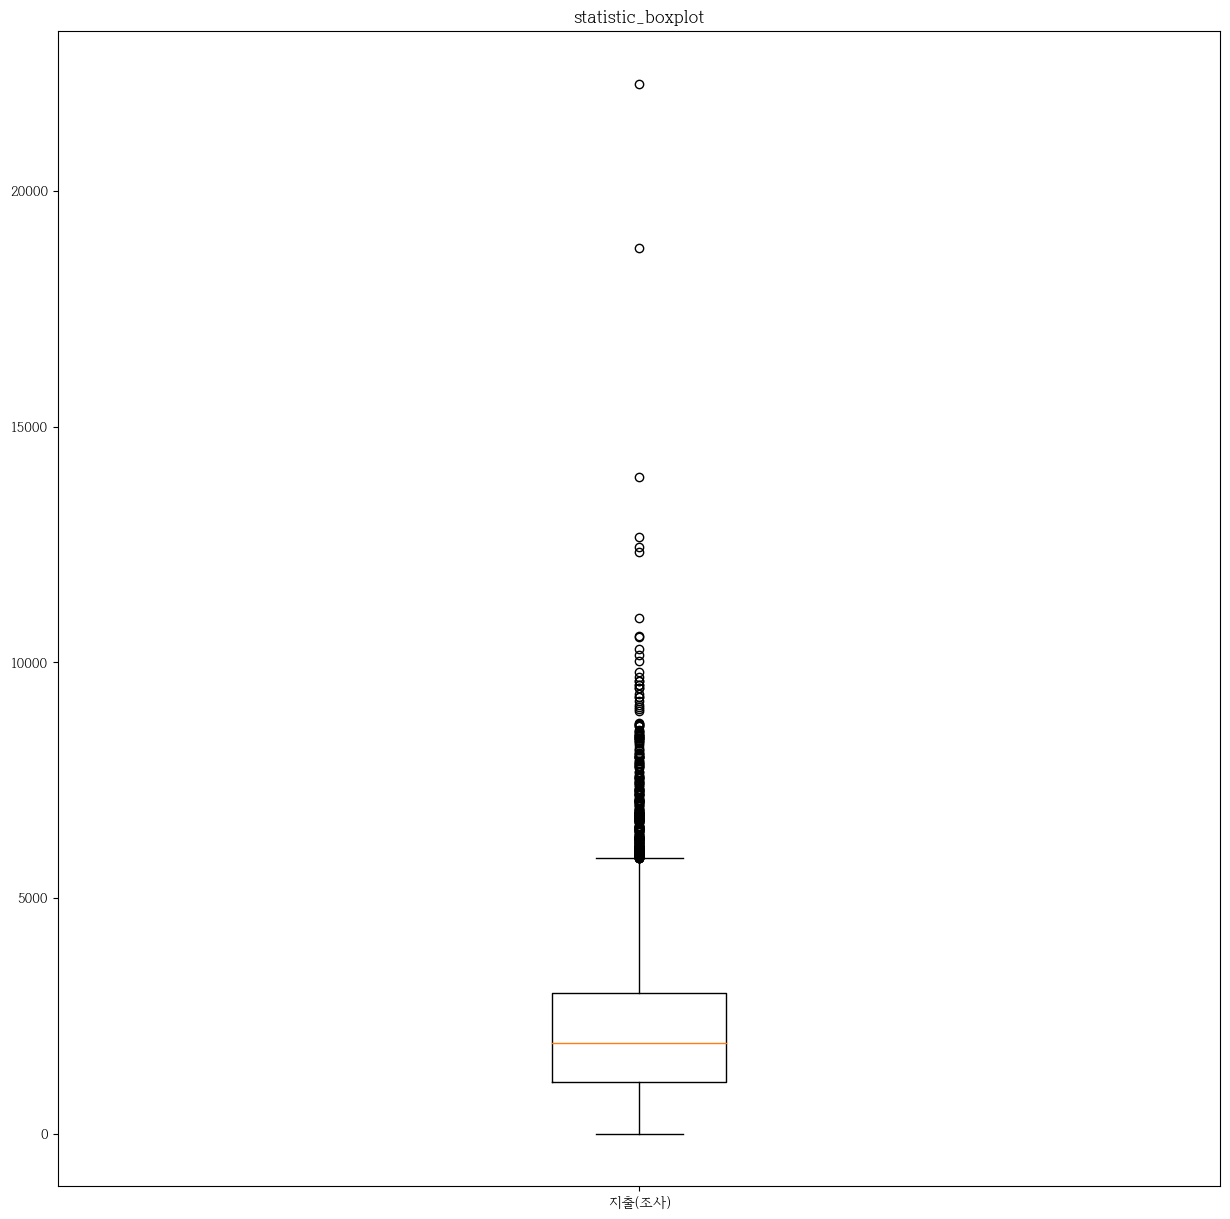

In [32]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.size'] = 10
plt.boxplot(final_data['consump'])
plt.xticks([1] , ['지출(조사)'])
plt.title('statistic_boxplot')  
plt.savefig('consump_boxplot')
plt.show()

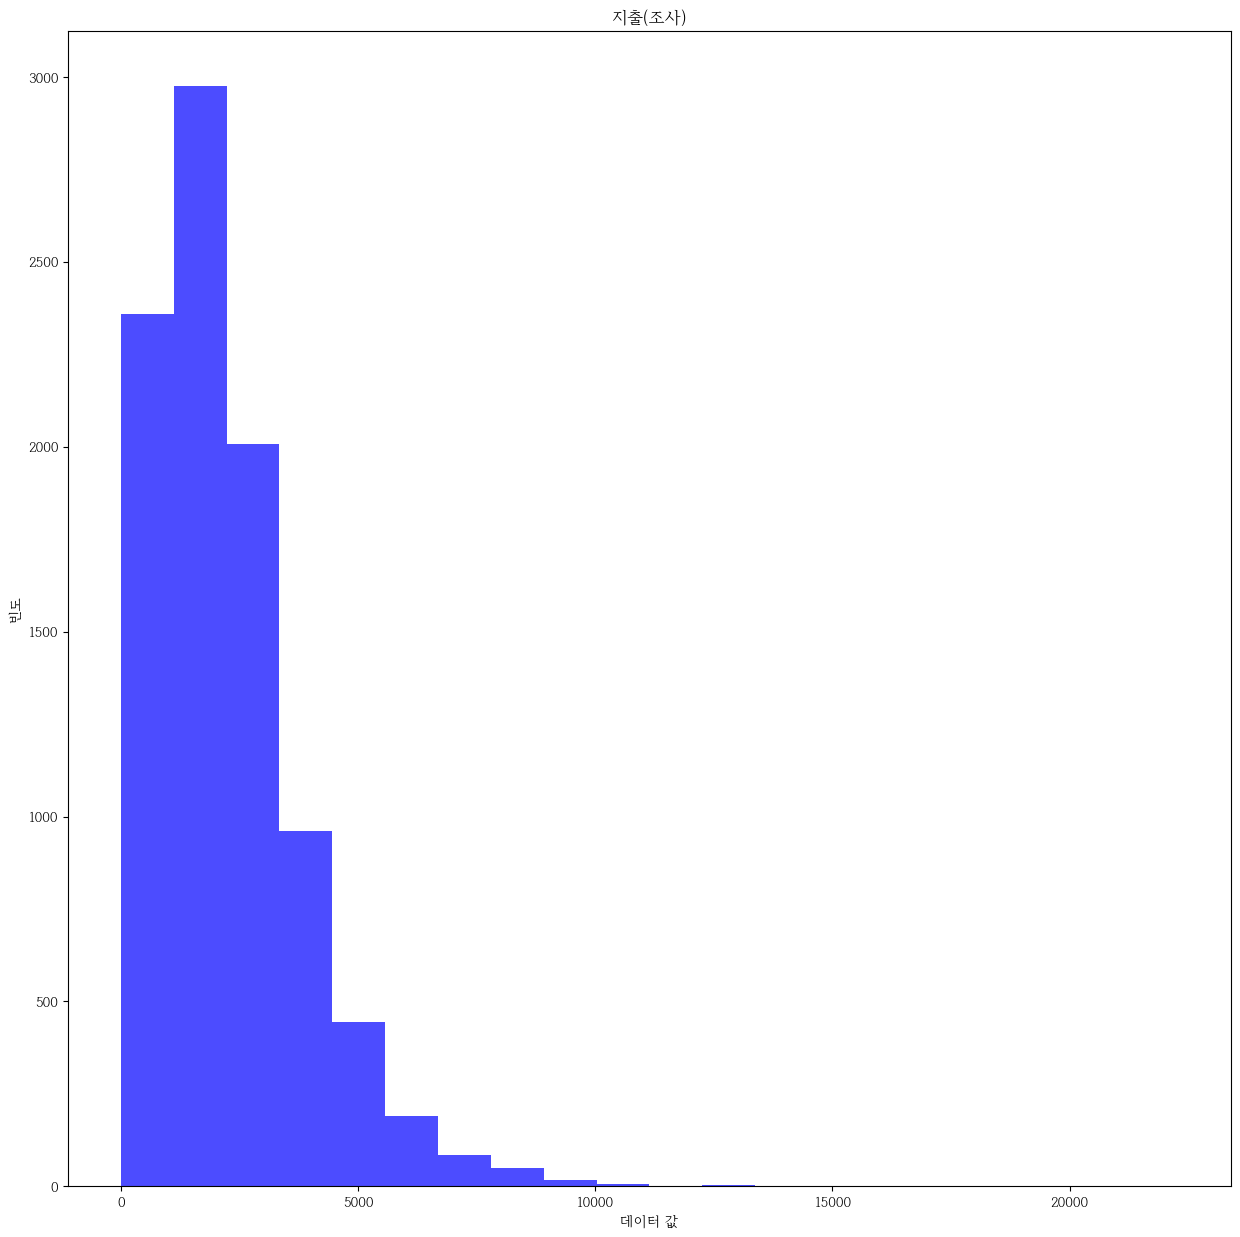

In [33]:
plt.hist(final_data['consump'], bins=20, color='blue', alpha=0.7)
plt.title('지출(조사)')
plt.xlabel('데이터 값')
plt.ylabel('빈도')
plt.savefig('consump_hist')

In [29]:
final_data.describe()

,id,age,income,income_lab,income_bis,income_property,income_trans,all_consump,consump,consump_food,...,consump_medi,consump_transp,consump_comm,consump_others,nonconsump,nonconsump_tax,nonconsump_pension,nonconsump_transfer,nonconsump_organization,nonconsump_interest
count,9.097000e+03,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,...,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000,9097.000000
mean,4.775172e+08,54.576344,4644.389579,2920.230516,1093.357810,233.137628,397.663625,3034.650984,2233.527756,638.171925,...,151.439376,246.803122,164.166538,453.337034,801.123227,202.465648,271.052435,82.516434,84.548093,160.540618
std,2.884020e+08,14.810015,4213.507075,3454.615789,2690.351935,1325.159544,733.963879,2453.003973,1574.892178,474.502763,...,266.618612,237.646444,121.063151,480.189322,1133.144793,528.375263,277.617549,246.562274,178.491918,442.236674
min,1.020015e+07,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.212002e+08,43.000000,1800.000000,0.000000,0.000000,0.000000,0.000000,1309.000000,1086.000000,300.000000,...,30.000000,60.000000,62.000000,150.000000,128.000000,13.000000,30.000000,0.000000,0.000000,0.000000
50%,4.632002e+08,54.000000,3666.000000,1920.000000,0.000000,0.000000,48.000000,2486.000000,1920.000000,540.000000,...,72.000000,200.000000,144.000000,310.000000,485.000000,61.000000,204.000000,0.000000,12.000000,0.000000
75%,7.235034e+08,66.000000,6222.000000,4600.000000,930.000000,0.000000,526.000000,4047.000000,2990.000000,840.000000,...,180.000000,360.000000,240.000000,600.000000,1071.000000,191.000000,420.000000,1.000000,100.000000,180.000000
max,9.952004e+08,97.000000,75700.000000,30000.000000,53000.000000,48275.000000,8522.000000,34618.000000,22280.000000,4800.000000,...,6000.000000,3600.000000,1800.000000,5500.000000,28730.000000,19760.000000,2693.000000,5000.000000,3708.000000,16899.000000


# 범주형

## 시나리오1에 대한 평가

### 빈도표

In [35]:
fo.calculate_multi_categorical_frequencies(final_data , scenario1 , 'sex')

원자료                  재현자료                 
   범주    빈도  상대빈도(퍼센트)   범주    빈도  상대빈도(퍼센트)
0   M  6898  75.827196    M  6153  67.637683
1   F  2199  24.172804    F  2944  32.362317

In [36]:
fo.calculate_multi_categorical_frequencies(final_data , scenario1 , 'edu')

원자료                  재현자료                 
    범주    빈도  상대빈도(퍼센트)   범주    빈도  상대빈도(퍼센트)
0   고등  2912  32.010553   고등  2941  32.329339
1  대학교  2115  23.249423  대학교  2122  23.326371
2   초등  1154  12.685501   대학  1268  13.938661
3   중등   988  10.860723   초등  1032  11.344399
4   대학   927  10.190173   중등   829   9.112894
5  대학원   538   5.914038  안받음   606   6.661537
6  안받음   463   5.089590  대학원   299   3.286798

### 막대그래프

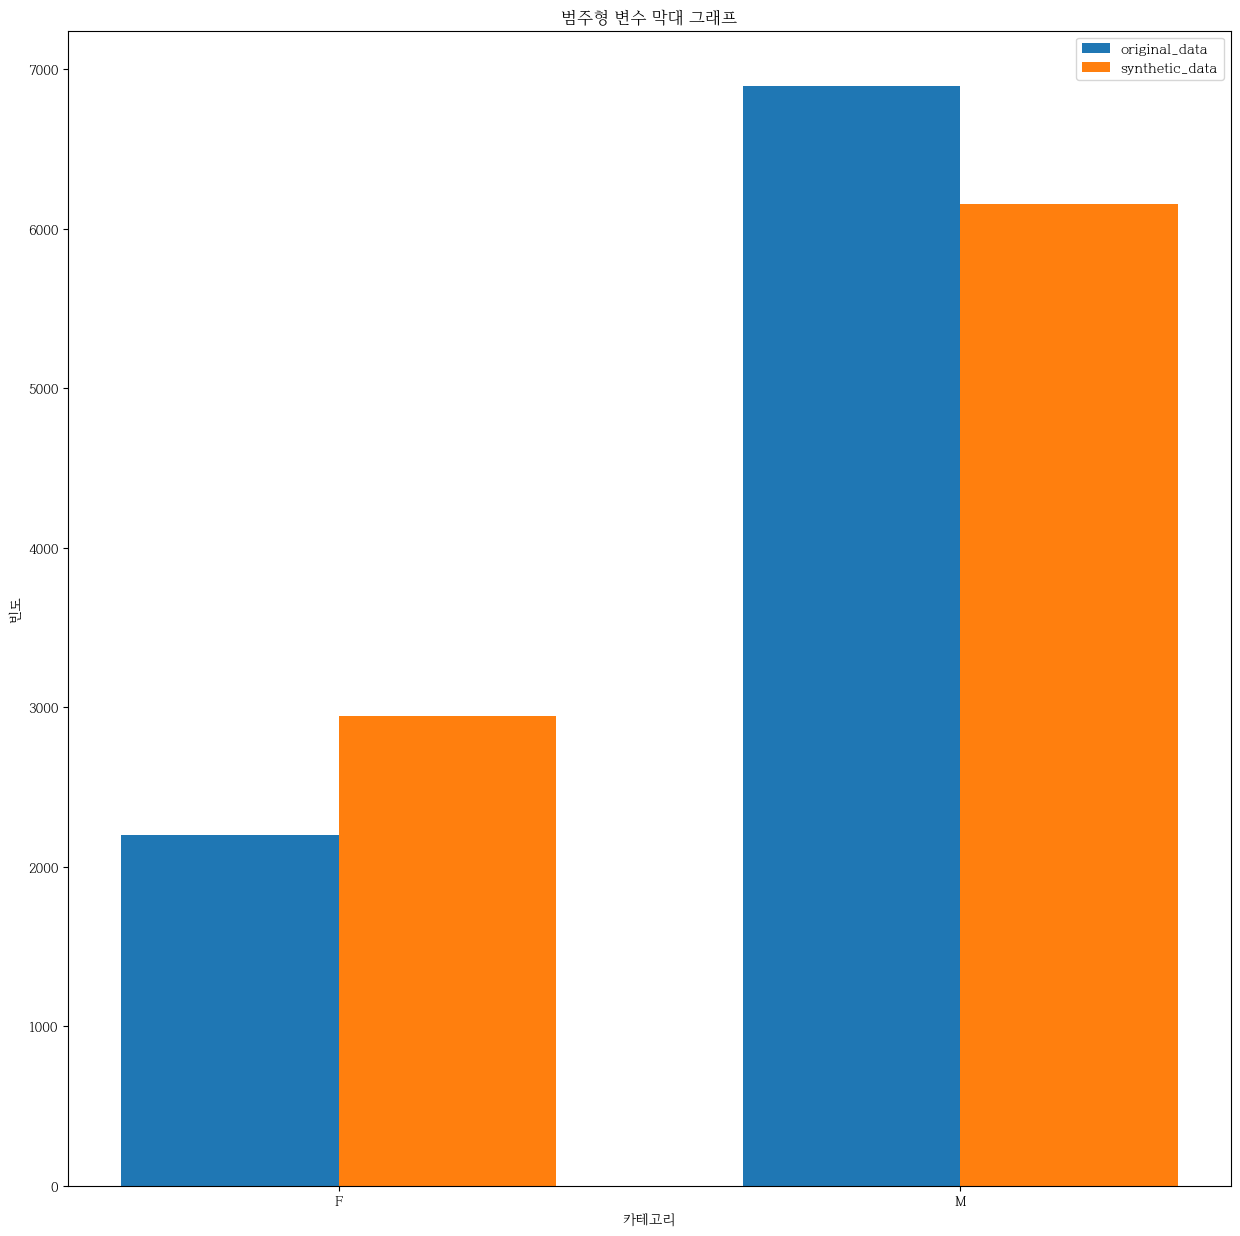

In [66]:
fo.bar_frequencies(final_data , scenario1 , 'sex' , 'scenario1_boxplot_sex')

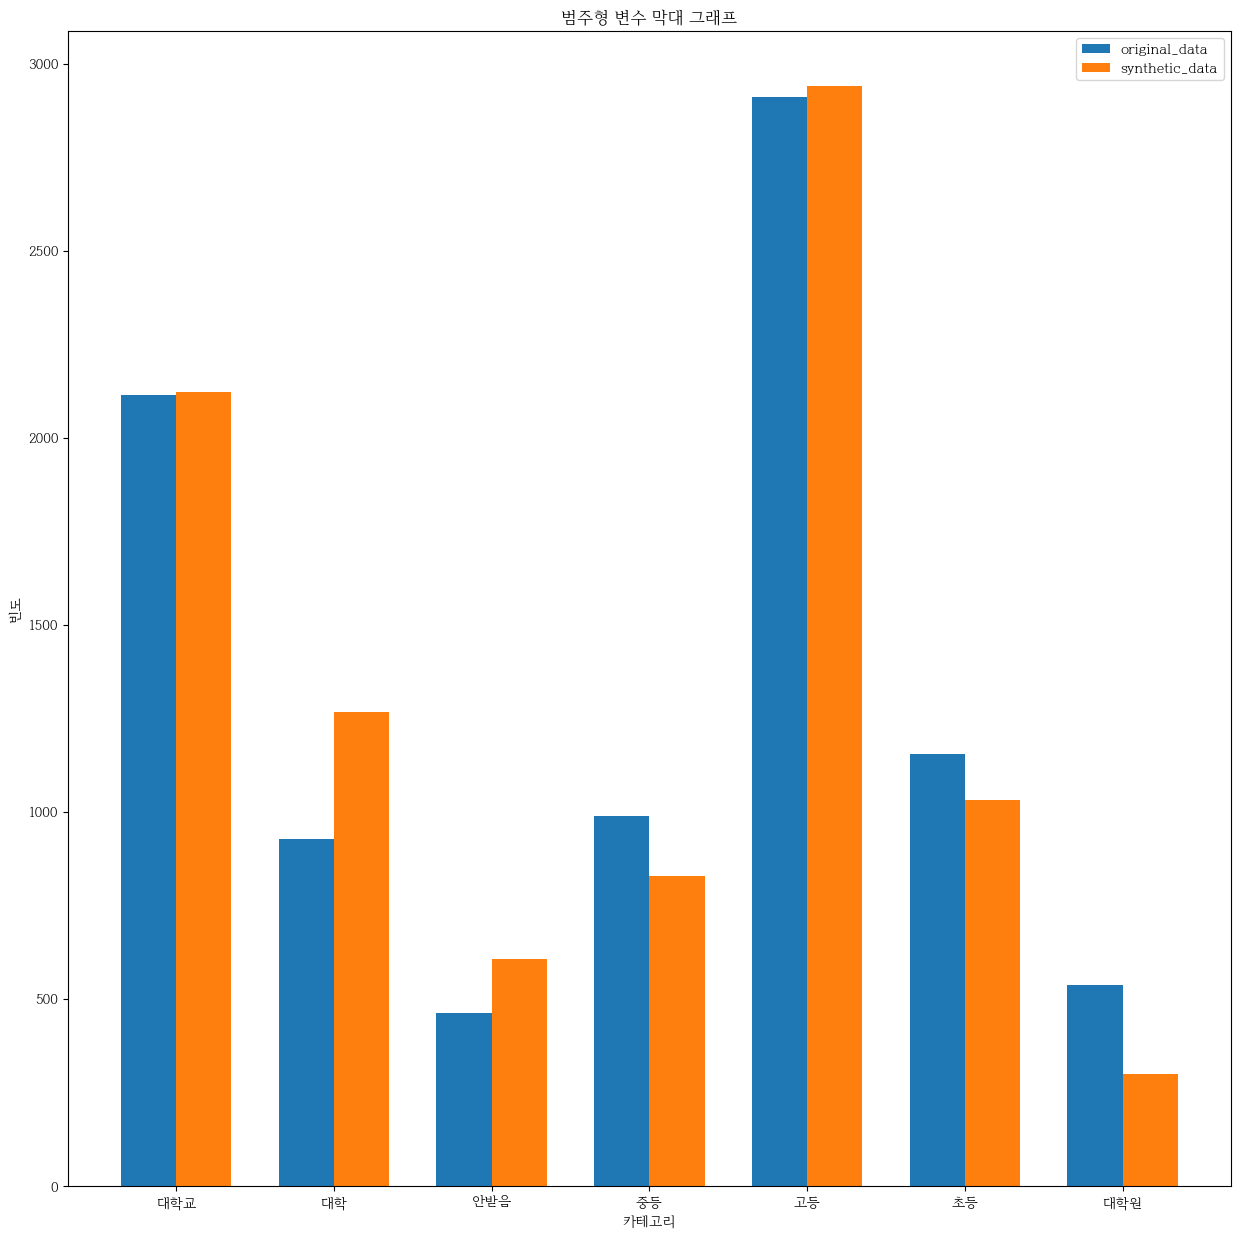

In [67]:
fo.bar_frequencies(final_data , scenario1 , 'edu' , 'scenario1_boxplot_edu')

In [56]:
fo.one_variable_categorical_tabular(final_data , scenario1 , 'sex' , 'edu')

,CategoryCoverages,TVComplement
sex,1.0,0.918105
edu,1.0,0.942838


In [57]:
fo.multiple_variable_categorical_tabular(final_data , scenario1 , 'sex' , 'edu')

,ContingencySimilarity
sex & edu,0.900846


In [88]:
selected_variable = ['sex' ,'edu' , 'income_lab']

In [89]:
selected_final_data = final_data[selected_variable]
selected_scenario1_data = scenario1_change[selected_variable]

In [90]:
selected_scenario1_data = scenario1_change[selected_variable]
selected_scenario2_data = scenario2_change[selected_variable]
selected_scenario3_data = scenario3_change[selected_variable]

In [16]:
#selected_scenario1_data = scenario1[selected_variable]
#selected_scenario2_data = scenario2_less_zero[selected_variable]
#selected_scenario3_data = scenario3_less_zero[selected_variable]

In [94]:
from sdmetrics.single_table import CategoricalGeneralizedCAP

In [113]:
score = CategoricalGeneralizedCAP.compute(
    real_data = final_data,
    synthetic_data = scenario1,
    key_fields = ['sex' , 'edu'],
    sensitive_fields = ['housemaster_job','marital status' ,'family_number'])

In [114]:
score

0.9143482769178525

In [92]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data = selected_final_data)

In [93]:
NewRowSynthesis.compute(
    real_data = selected_final_data,
    synthetic_data = selected_scenario1_data,
    metadata=metadata,
    numerical_match_tolerance=0.01,
    synthetic_sample_size=None
)

0.21347697042981204

In [40]:
NewRowSynthesis.compute(
    real_data = selected_final_data,
    synthetic_data = selected_scenario2_data,
    metadata=metadata,
    numerical_match_tolerance=0.01,
    synthetic_sample_size=9_000
)

0.0

In [41]:
NewRowSynthesis.compute(
    real_data = selected_final_data,
    synthetic_data = selected_scenario3_data,
    metadata=metadata,
    numerical_match_tolerance=0.01,
    synthetic_sample_size=9_000
)

0.0

In [15]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data = one_df)

In [16]:
NewRowSynthesis.compute(
    real_data=one_df,
    synthetic_data=two_df,
    metadata=metadata,
    numerical_match_tolerance=0.01,
    synthetic_sample_size=3
)

0.3333333333333333

## 시나리오2에 대한 평가

### 빈도표

In [58]:
fo.calculate_multi_categorical_frequencies(final_data , scenario2_less_zero , 'sex')

원자료                  재현자료                 
   범주    빈도  상대빈도(퍼센트)   범주    빈도  상대빈도(퍼센트)
0   M  6898  75.827196    M  5964  65.560075
1   F  2199  24.172804    F  3133  34.439925

In [59]:
fo.calculate_multi_categorical_frequencies(final_data , scenario2_less_zero , 'edu')

원자료                  재현자료                 
    범주    빈도  상대빈도(퍼센트)   범주    빈도  상대빈도(퍼센트)
0   고등  2912  32.010553   고등  2994  32.911949
1  대학교  2115  23.249423  대학교  1531  16.829724
2   초등  1154  12.685501   초등  1312  14.422337
3   중등   988  10.860723  안받음  1015  11.157524
4   대학   927  10.190173   중등   898   9.871386
5  대학원   538   5.914038   대학   710   7.804771
6  안받음   463   5.089590  대학원   637   7.002308

In [60]:
fo.calculate_multi_categorical_frequencies(final_data , scenario2_more_zero , 'sex')

원자료                  재현자료                 
   범주    빈도  상대빈도(퍼센트)   범주    빈도  상대빈도(퍼센트)
0   M  6898  75.827196    M  5737  63.064747
1   F  2199  24.172804    F  3360  36.935253

In [61]:
fo.calculate_multi_categorical_frequencies(final_data , scenario2_more_zero , 'edu')

원자료                  재현자료                 
    범주    빈도  상대빈도(퍼센트)   범주    빈도  상대빈도(퍼센트)
0   고등  2912  32.010553   고등  3240  35.616137
1  대학교  2115  23.249423  대학교  1818  19.984610
2   초등  1154  12.685501   초등  1141  12.542596
3   중등   988  10.860723   대학   947  10.410025
4   대학   927  10.190173   중등   827   9.090909
5  대학원   538   5.914038  안받음   628   6.903375
6  안받음   463   5.089590  대학원   496   5.452347

### 막대그래프

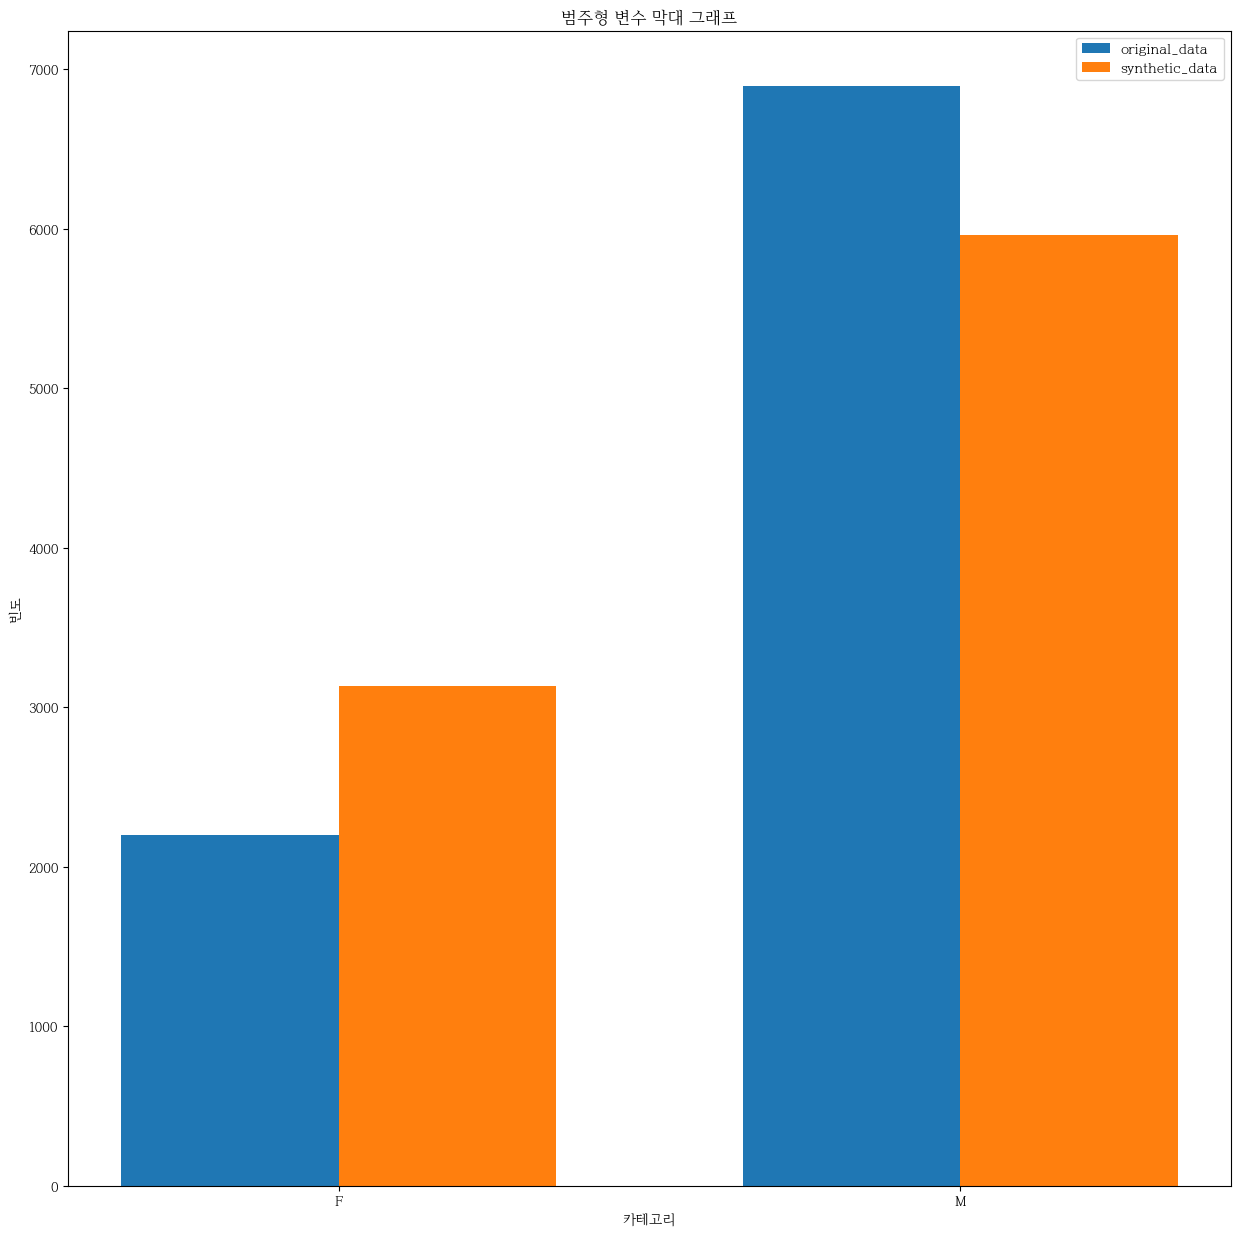

In [68]:
fo.bar_frequencies(final_data ,scenario2_less_zero , 'sex' , 'scenario2_less_sex')

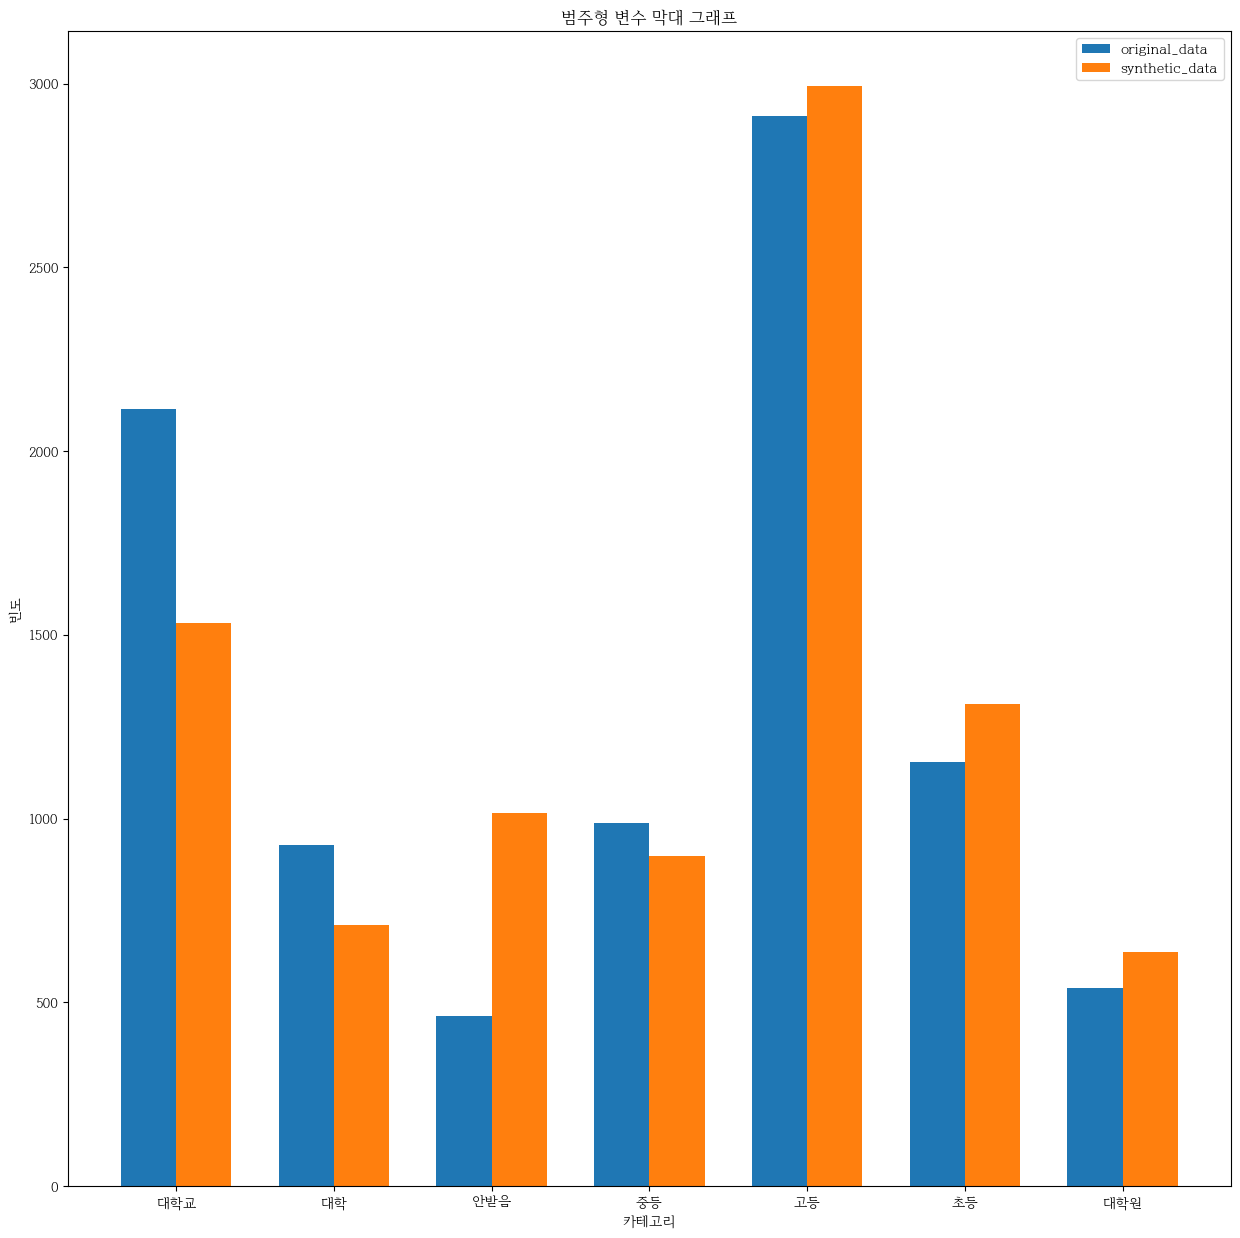

In [70]:
fo.bar_frequencies(final_data , scenario2_less_zero , 'edu' , 'scenario2_less_edu')

In [73]:
fo.one_variable_categorical_tabular(final_data , scenario2_less_zero , 'sex','edu')

,CategoryCoverages,TVComplement
sex,1.0,0.897329
edu,1.0,0.902056


In [74]:
fo.multiple_variable_categorical_tabular(final_data , scenario2_less_zero , 'sex' , 'edu')

,ContingencySimilarity
sex & edu,0.85116


##  시나리오3에 대한 평가

### 빈도표

In [117]:
fo.calculate_multi_categorical_frequencies(final_data ,scenario3_less_zero , 'sex')

원자료                  재현자료                 
   범주    빈도  상대빈도(퍼센트)   범주    빈도  상대빈도(퍼센트)
0   M  6898  75.827196    M  7047  77.465098
1   F  2199  24.172804    F  2050  22.534902

In [124]:
fo.calculate_multi_categorical_frequencies(final_data , scenario3_less_zero , 'edu')

원자료                  재현자료                 
    범주    빈도  상대빈도(퍼센트)   범주    빈도  상대빈도(퍼센트)
0   고등  2912  32.010553   고등  3268  35.923931
1  대학교  2115  23.249423  대학교  2210  24.293723
2   초등  1154  12.685501   중등  1200  13.191162
3   중등   988  10.860723   초등   817   8.980983
4   대학   927  10.190173   대학   645   7.090250
5  대학원   538   5.914038  대학원   495   5.441354
6  안받음   463   5.089590  안받음   462   5.078597

In [125]:
fo.calculate_multi_categorical_frequencies(final_data ,scenario3_more_zero , 'sex')

원자료                  재현자료                 
   범주    빈도  상대빈도(퍼센트)   범주    빈도  상대빈도(퍼센트)
0   M  6898  75.827196    M  6686  73.496757
1   F  2199  24.172804    F  2411  26.503243

In [126]:
fo.calculate_multi_categorical_frequencies(final_data , scenario3_more_zero , 'edu')

원자료                  재현자료                 
    범주    빈도  상대빈도(퍼센트)   범주    빈도  상대빈도(퍼센트)
0   고등  2912  32.010553   고등  2604  28.624821
1  대학교  2115  23.249423  대학교  2500  27.481587
2   초등  1154  12.685501   중등  1231  13.531934
3   중등   988  10.860723   초등  1008  11.080576
4   대학   927  10.190173   대학   805   8.849071
5  대학원   538   5.914038  안받음   586   6.441684
6  안받음   463   5.089590  대학원   363   3.990326

In [127]:
fo.one_variable_categorical_tabular(final_data , scenario3_less_zero , 'sex','edu')

,CategoryCoverages,TVComplement
sex,1.0,0.983621
edu,1.0,0.927119


In [128]:
fo.multiple_variable_categorical_tabular(final_data , scenario3_less_zero , 'sex' , 'edu')

,ContingencySimilarity
sex & edu,0.894471


### 막대그래프

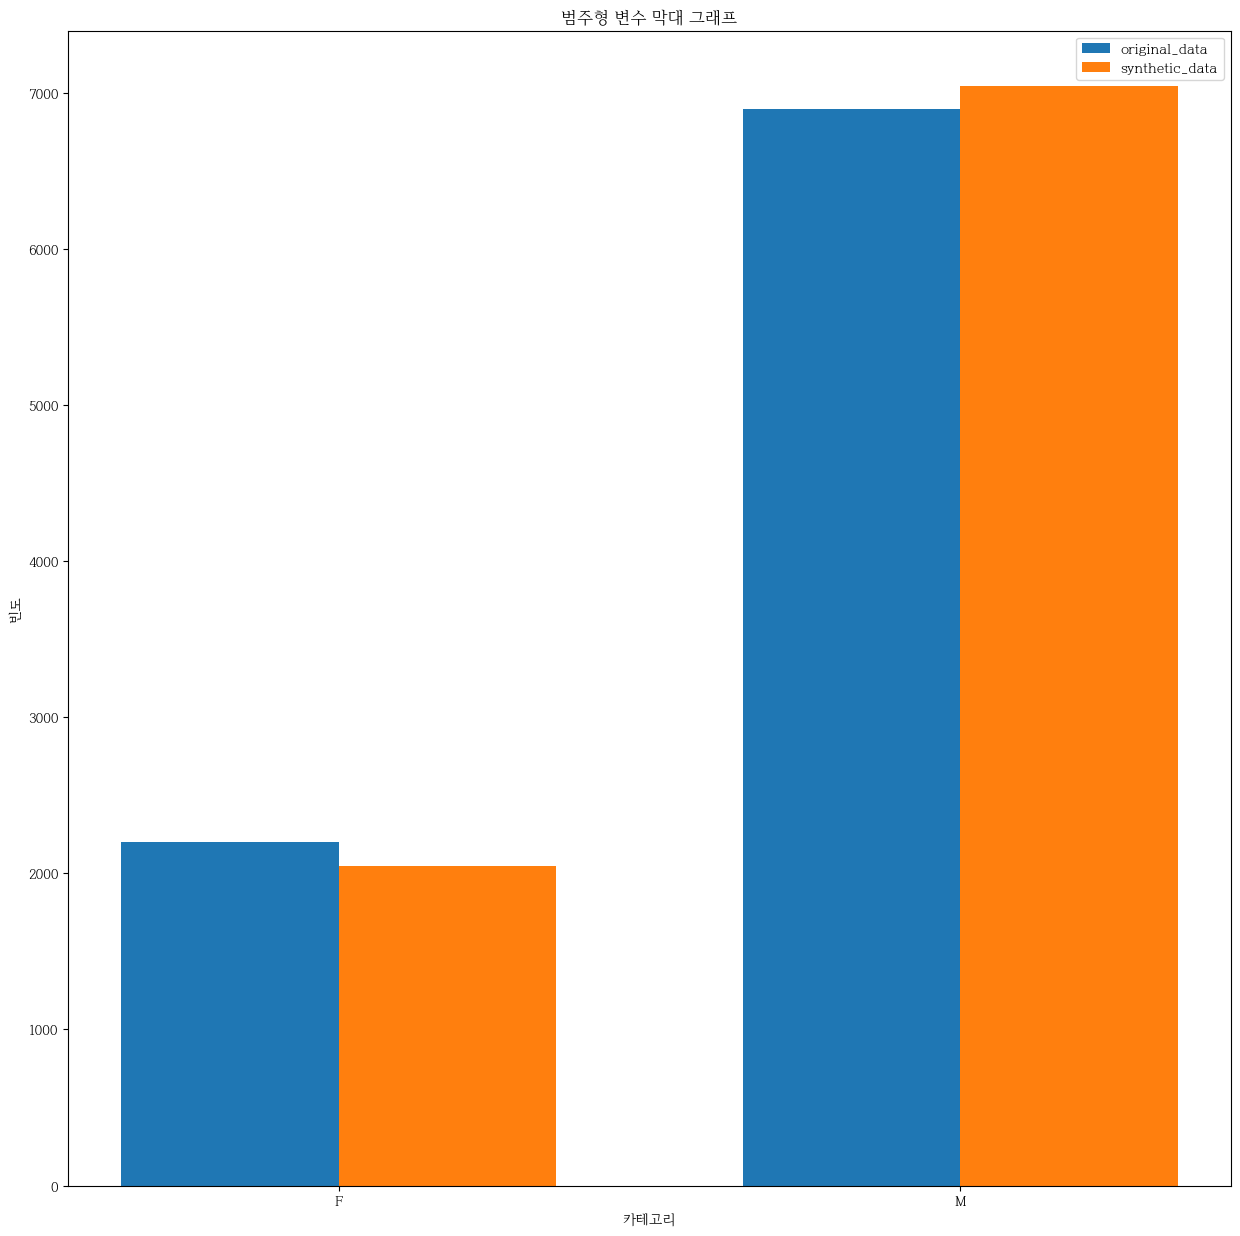

In [131]:
fo.bar_frequencies(final_data ,scenario3_less_zero , 'sex' , 'scenario3_less_sex')

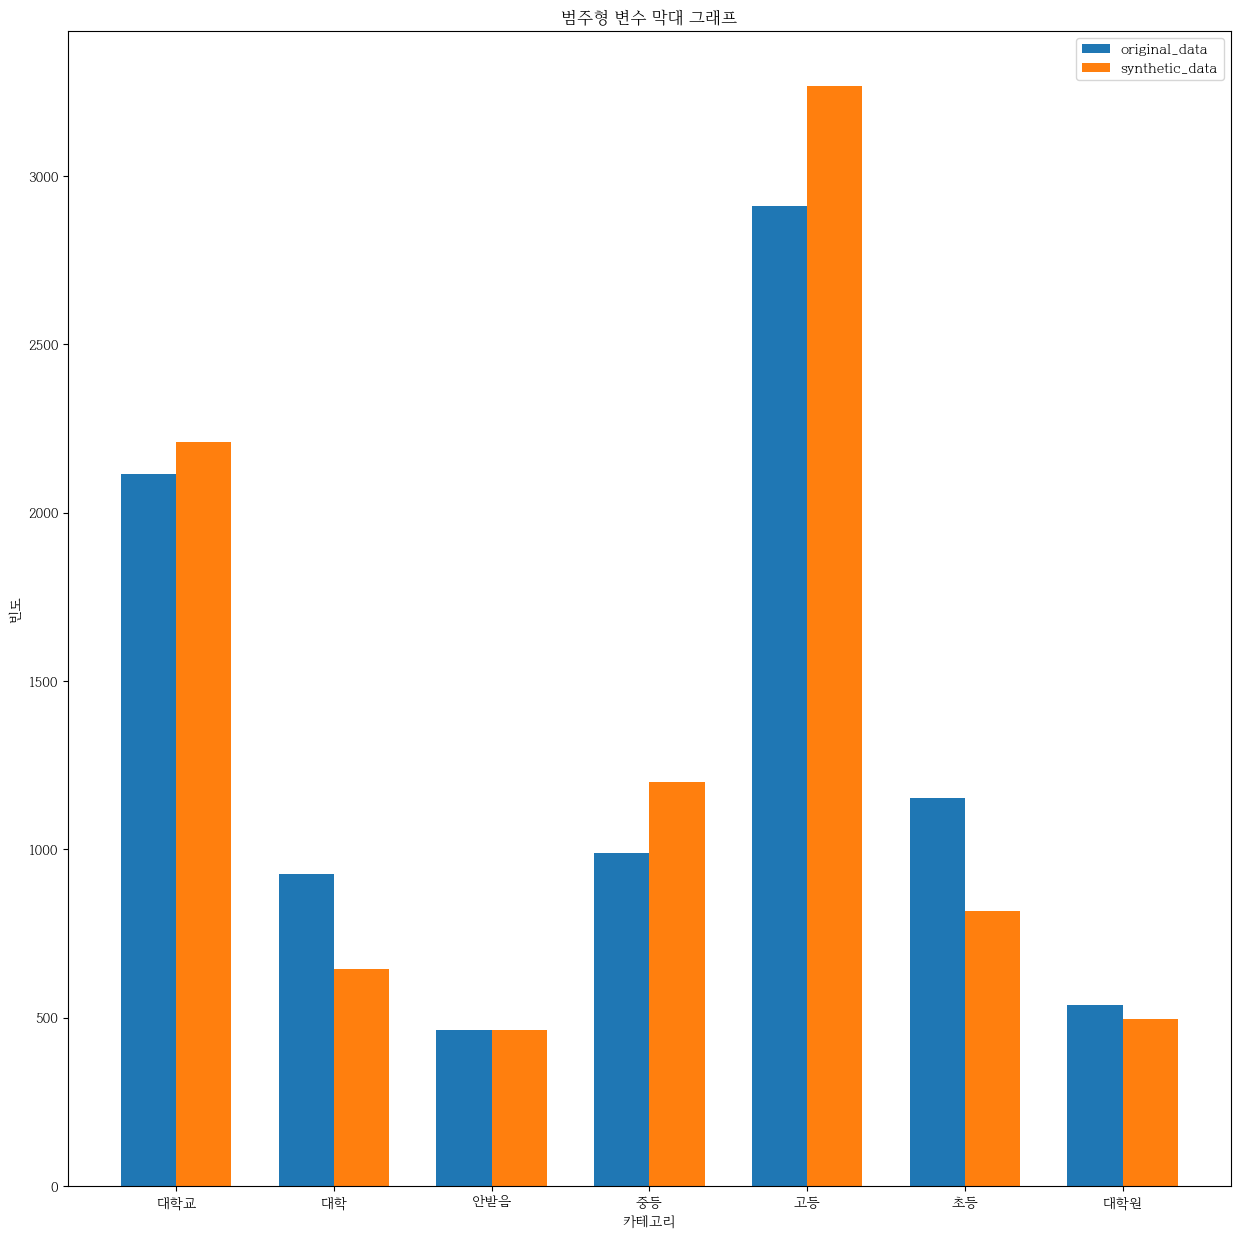

In [132]:
fo.bar_frequencies(final_data , scenario3_less_zero , 'edu' , 'scenario3_less_edu')

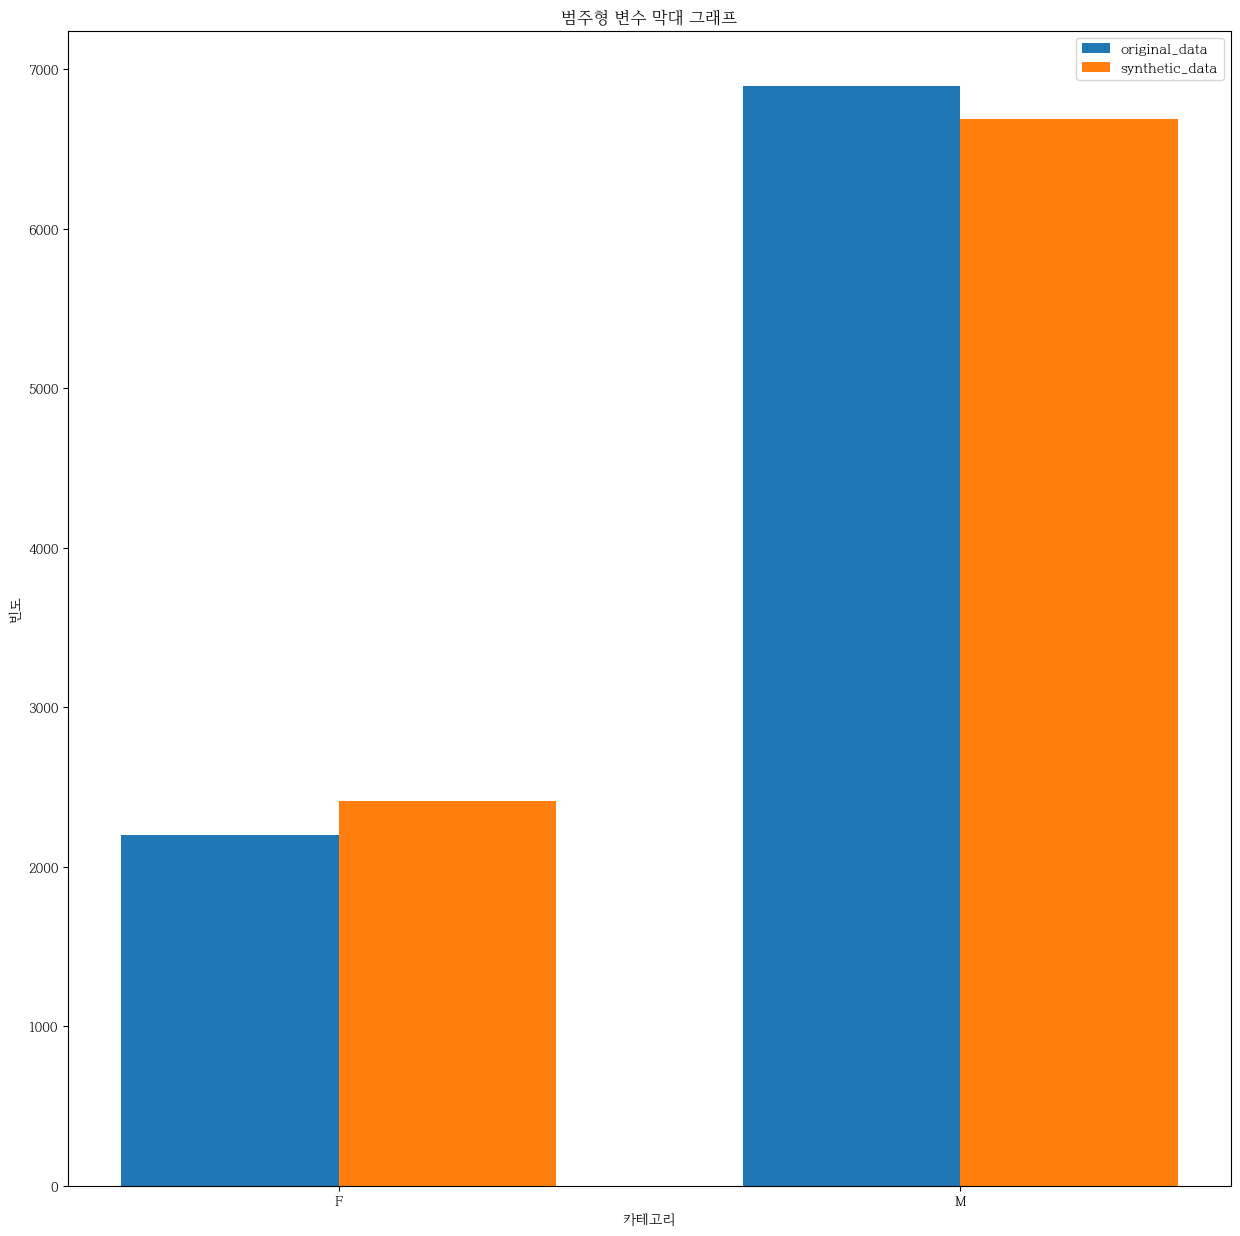

In [133]:
fo.bar_frequencies(final_data ,scenario3_more_zero , 'sex' , 'scenario3_more_sex')

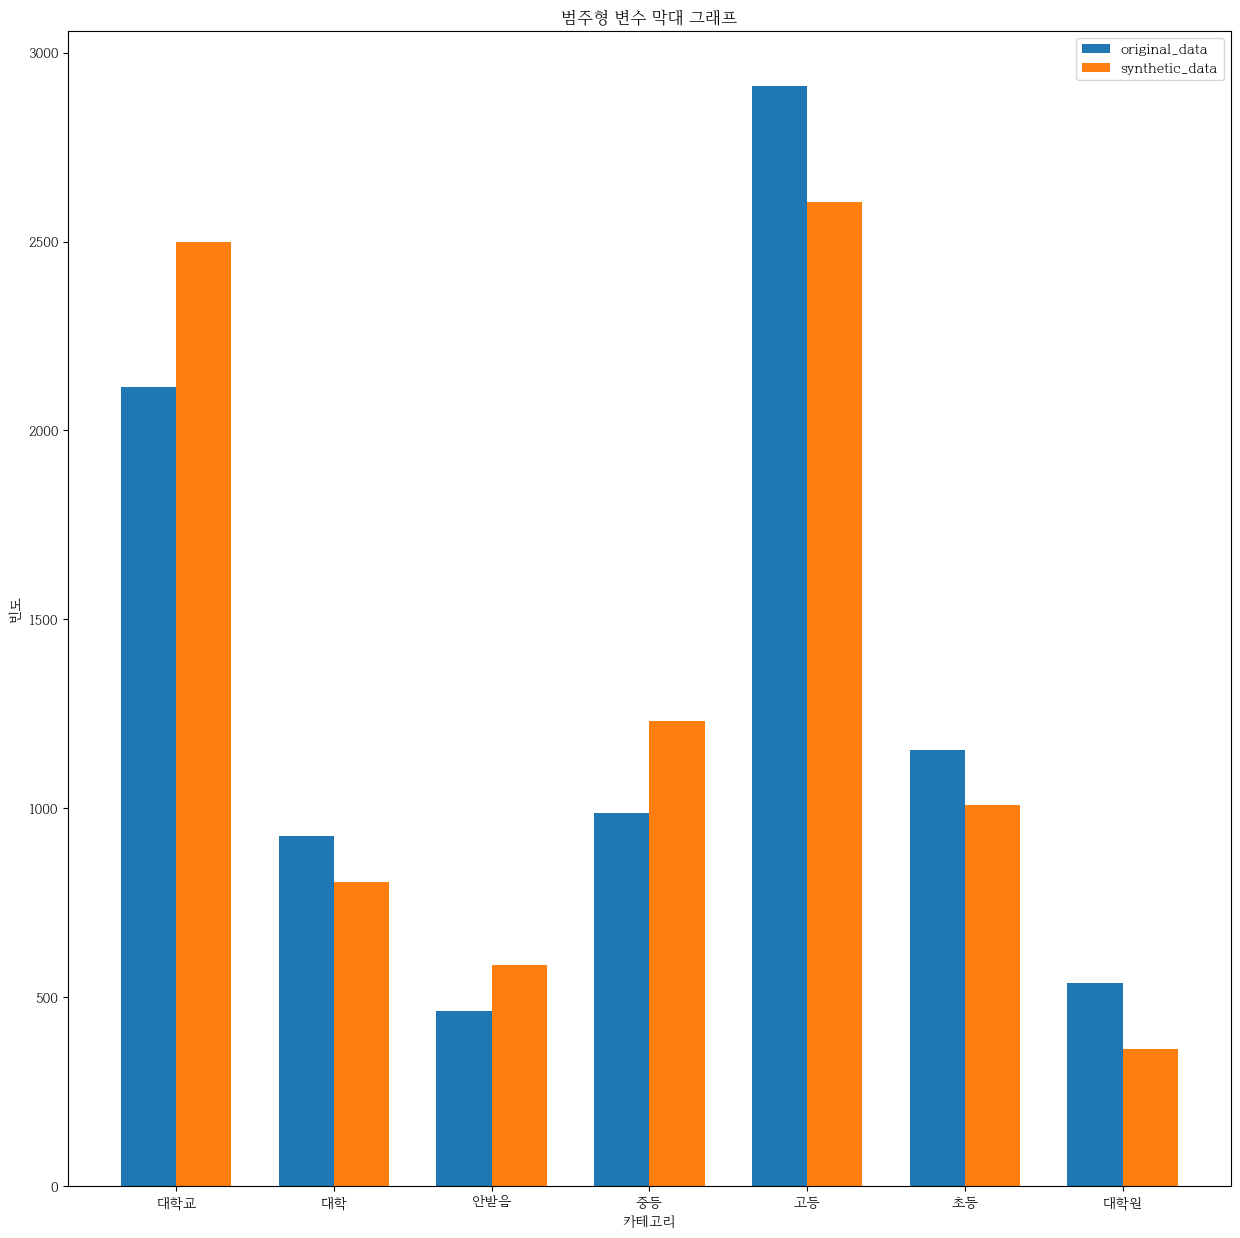

In [134]:
fo.bar_frequencies(final_data ,scenario3_more_zero , 'edu' , 'scenario3_more_edu')

# 연속형

## 시나리오 1에 대한 평가

### 검정통계량 및 측도

In [5]:
percent = [0.2 , 0.5 , 0.8]

In [53]:
fo.statistic(final_data , scenario1 , 'income_lab' , percent)[0]

,original_statistic,synthetic_statistic,bias_statistic,relative_bias_statistic
mean,2920.230516,2887.648895,-32.58162,-1.115721
std,3454.615789,3329.196059,-125.41973,-3.630497
min,0.000000,0.000000,0.00000,0.000000
20%,0.000000,0.000000,0.00000,0.000000
50%,1920.000000,1693.000000,-227.00000,-11.822917
80%,5359.800000,5857.000000,497.20000,9.276466
max,30000.000000,20940.000000,-9060.00000,-30.200000


In [54]:
fo.statistic(final_data , scenario1, 'consump_food' , percent)[0]

,original_statistic,synthetic_statistic,bias_statistic,relative_bias_statistic
mean,638.171925,530.174233,-107.997692,-16.922978
std,474.502763,432.442740,-42.060023,-8.864021
min,0.000000,0.000000,0.000000,0.000000
20%,240.000000,206.000000,-34.000000,-14.166667
50%,540.000000,384.000000,-156.000000,-28.888889
80%,960.000000,729.000000,-231.000000,-24.062500
max,4800.000000,2918.000000,-1882.000000,-39.208333


In [55]:
fo.statistic(final_data , scenario1, 'nonconsump_tax' , percent)[0]

,original_statistic,synthetic_statistic,bias_statistic,relative_bias_statistic
mean,202.465648,243.576784,41.111136,20.305240
std,528.375263,456.235075,-72.140188,-13.653211
min,0.000000,0.000000,0.000000,0.000000
20%,8.000000,17.000000,9.000000,112.500000
50%,61.000000,44.000000,-17.000000,-27.868852
80%,254.000000,454.800000,200.800000,79.055118
max,19760.000000,5109.000000,-14651.000000,-74.144737


In [13]:
fo.one_variable_discrete_tabular(final_data , scenario1 , 'income_lab' , 'consump_food' , 'nonconsump_tax')

,KSComplement,RangeCoverage,BoundaryAdherence,MSE,MAE
income_lab,0.937232,0.698000,1.0,2.308489e+07,3500.958012
consump_food,0.800044,0.607917,1.0,4.115772e+05,465.989075
nonconsump_tax,0.896999,0.258553,1.0,5.315591e+05,330.723650


In [14]:
fo.multiple_variable_discrete_tabular(final_data , scenario1 , 'income_lab' , 'consump_food' , 'nonconsump_tax')

,KLDS,CorrelationSimilarity
income_lab & consump_food,0.870005,0.939628
income_lab & nonconsump_tax,0.978496,0.964305
consump_food & nonconsump_tax,0.913122,0.933799


In [37]:
final_data[['income_lab' , 'consump_food' , 'nonconsump_tax']].corr(method = 'pearson')

,income_lab,consump_food,nonconsump_tax
income_lab,1.000000,0.464664,0.451338
consump_food,0.464664,1.000000,0.392293
nonconsump_tax,0.451338,0.392293,1.000000


In [38]:
scenario1[['income_lab' , 'consump_food' , 'nonconsump_tax']].corr(method = 'pearson')

,income_lab,consump_food,nonconsump_tax
income_lab,1.000000,0.343920,0.379948
consump_food,0.343920,1.000000,0.524695
nonconsump_tax,0.379948,0.524695,1.000000


In [82]:
linear_final = final_data[['sex' ,'edu','income_lab' , 'consump_food' , 'nonconsump_tax']] 

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 전처리: 범주형 변수 처리
categorical_columns = ['sex', 'edu']
label_encoder = LabelEncoder()

for col in categorical_columns:
    linear_final[col] = label_encoder.fit_transform(linear_final[col])

# 더미 변수 생성
linear_final = pd.get_dummies(linear_final, columns=categorical_columns)

# 독립변수(X)와 종속변수(y) 분리
X = linear_final
y = final_data['income']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화 (선택적)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Intercept:", model.intercept_)
print("\nCoefficients:")
print(coefficients)

Intercept: 4648.864229765013

Coefficients:
           Feature  Coefficient
0       income_lab  1312.518511
1     consump_food   837.891774
2   nonconsump_tax  2111.154712
3            sex_0  -145.205417
4            sex_1   145.205417
5            edu_0    74.370517
6            edu_1    47.836493
7            edu_2   117.841895
8            edu_3    76.624221
9            edu_4  -156.191260
10           edu_5   -70.250194
11           edu_6  -181.859136


In [84]:
linear_scenario1 = scenario1[['sex' ,'edu','income_lab' , 'consump_food' , 'nonconsump_tax']] 

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 전처리: 범주형 변수 처리
categorical_columns = ['sex', 'edu']
label_encoder = LabelEncoder()

for col in categorical_columns:
    linear_scenario1[col] = label_encoder.fit_transform(linear_scenario1[col])

# 더미 변수 생성
linear_scenario1 = pd.get_dummies(linear_scenario1, columns=categorical_columns)

# 독립변수(X)와 종속변수(y) 분리
X = linear_scenario1
y = scenario1['income']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화 (선택적)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Intercept:", model.intercept_)
print("\nCoefficients:")
print(coefficients)

Intercept: 5044.393019101278

Coefficients:
           Feature  Coefficient
0       income_lab    70.589843
1     consump_food  1993.461166
2   nonconsump_tax  1939.651153
3            sex_0  -175.840420
4            sex_1   175.840420
5            edu_0   -63.777354
6            edu_1   -78.608285
7            edu_2   166.142192
8            edu_3   619.061935
9            edu_4  -162.519291
10           edu_5   -80.031506
11           edu_6  -194.991100


### 산점도

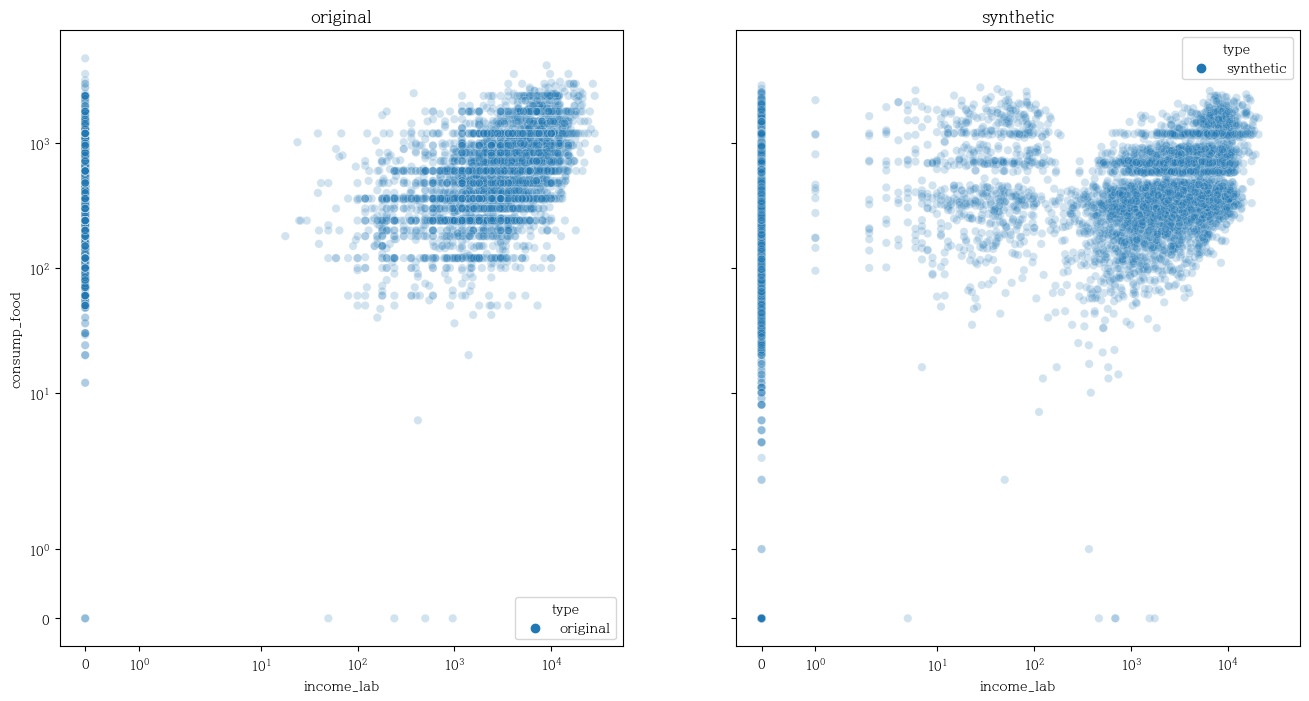

In [6]:
a = final_data.copy()
b = scenario1.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[0],train_vars[1],  'type', ['original','synthetic'], train_vars[0],train_vars[1], 'Scenario1_1.png')

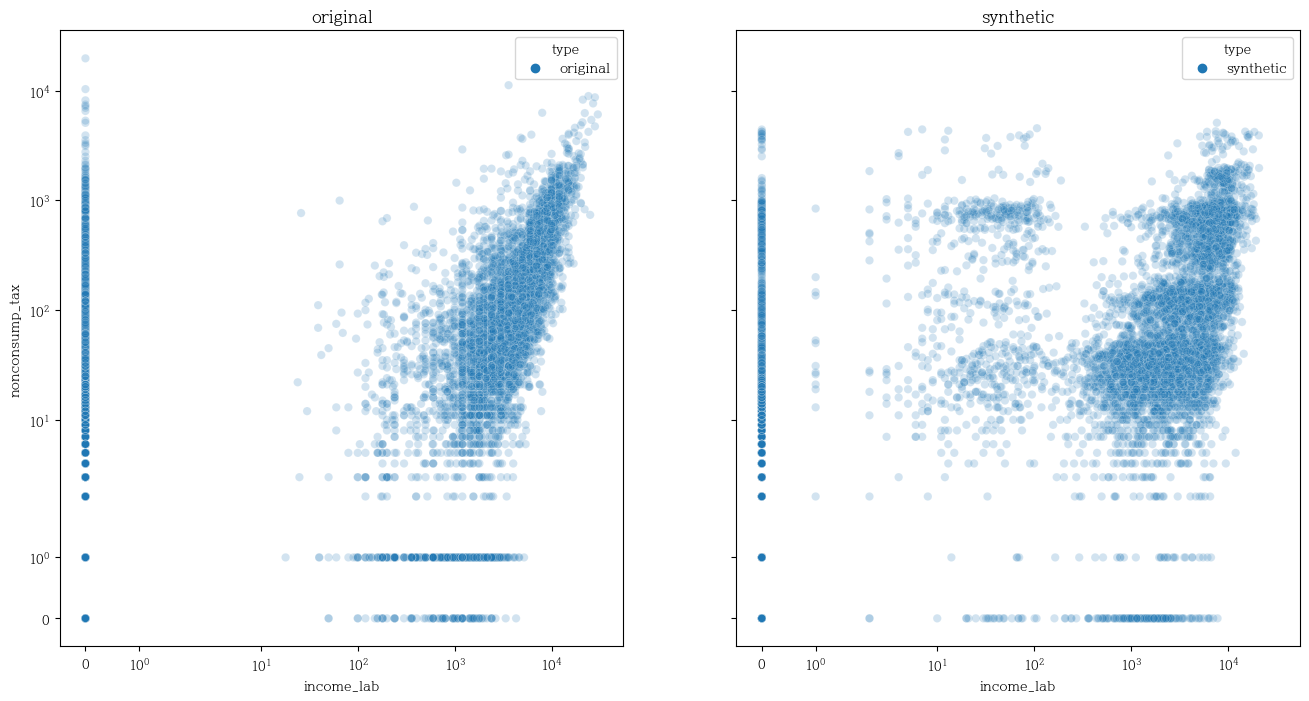

In [8]:
a = final_data.copy()
b = scenario1.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[0],train_vars[2],  'type', ['original','synthetic'], train_vars[0],train_vars[2], 'Scenario1_2.png')

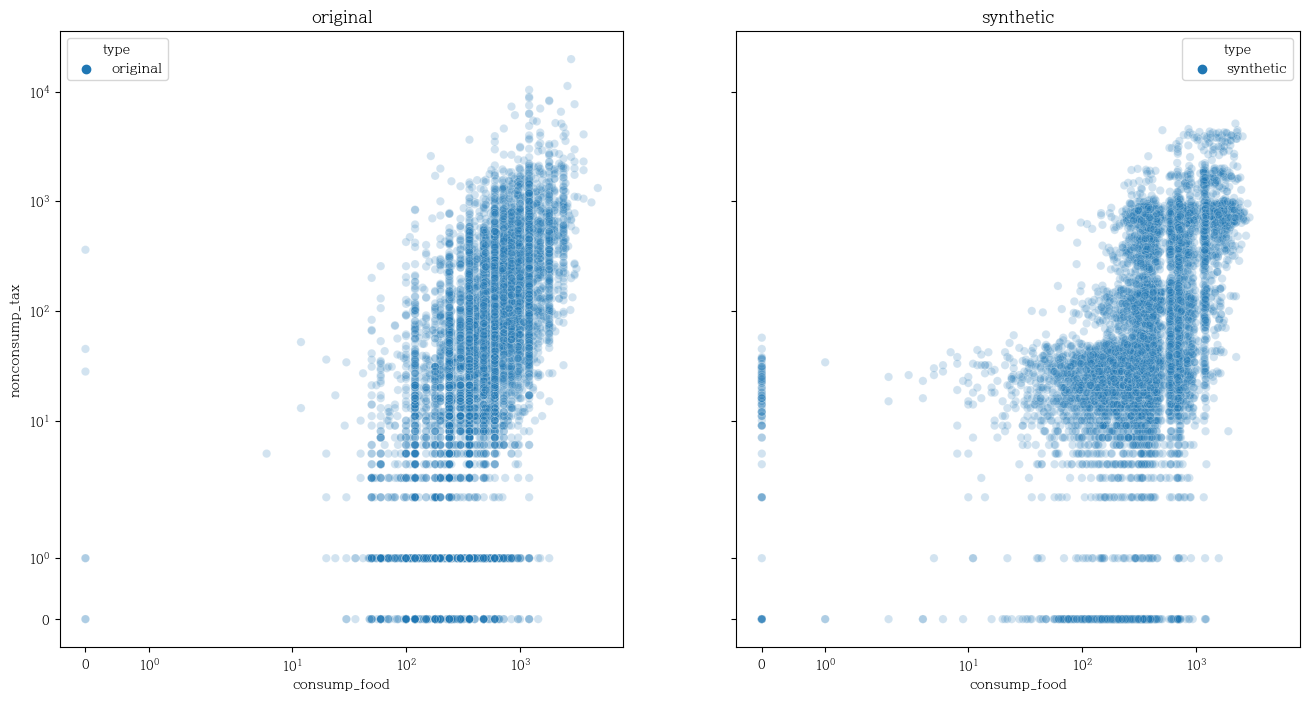

In [9]:
a = final_data.copy()
b = scenario1.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[1],train_vars[2],  'type', ['original','synthetic'], train_vars[1],train_vars[2], 'Scenario1_3.png')

## 시나리오2에 대한 평가

###  검정통계량 및 측도

In [56]:
fo.statistic(final_data , scenario2_less_zero , 'income_lab' , percent)[0]

,original_statistic,synthetic_statistic,bias_statistic,relative_bias_statistic
mean,2920.230516,2766.172804,-154.057711,-5.275533
std,3454.615789,3344.361092,-110.254698,-3.191518
min,0.000000,0.000000,0.000000,0.000000
20%,0.000000,0.000000,0.000000,0.000000
50%,1920.000000,1726.000000,-194.000000,-10.104167
80%,5359.800000,5396.800000,37.000000,0.690324
max,30000.000000,28531.000000,-1469.000000,-4.896667


In [57]:
fo.statistic(final_data , scenario2_less_zero, 'consump_food' , percent)[0]

,original_statistic,synthetic_statistic,bias_statistic,relative_bias_statistic
mean,638.171925,592.407937,-45.763988,-7.171106
std,474.502763,404.338490,-70.164273,-14.786905
min,0.000000,0.000000,0.000000,0.000000
20%,240.000000,235.000000,-5.000000,-2.083333
50%,540.000000,517.000000,-23.000000,-4.259259
80%,960.000000,881.000000,-79.000000,-8.229167
max,4800.000000,2823.000000,-1977.000000,-41.187500


In [58]:
fo.statistic(final_data , scenario2_less_zero, 'nonconsump_tax' , percent)[0]

,original_statistic,synthetic_statistic,bias_statistic,relative_bias_statistic
mean,202.465648,192.817522,-9.648126,-4.765315
std,528.375263,367.974447,-160.400816,-30.357367
min,0.000000,0.000000,0.000000,0.000000
20%,8.000000,4.000000,-4.000000,-50.000000
50%,61.000000,64.000000,3.000000,4.918033
80%,254.000000,310.000000,56.000000,22.047244
max,19760.000000,6824.000000,-12936.000000,-65.465587


In [21]:
fo.one_variable_discrete_tabular(final_data , scenario2_less_zero , 'income_lab' , 'consump_food' , 'nonconsump_tax')

,KSComplement,RangeCoverage,BoundaryAdherence,MSE,MAE
income_lab,0.942069,0.951033,1.0,2.343830e+07,3476.861397
consump_food,0.910190,0.588125,1.0,4.071019e+05,474.031491
nonconsump_tax,0.949214,0.345344,1.0,4.407242e+05,287.836975


In [22]:
fo.multiple_variable_discrete_tabular(final_data , scenario2_less_zero , 'income_lab' , 'consump_food' , 'nonconsump_tax')

,KLDS,CorrelationSimilarity
income_lab & consump_food,0.955301,0.957312
income_lab & nonconsump_tax,0.978588,0.948545
consump_food & nonconsump_tax,0.973900,0.973489


In [31]:
final_data[['income_lab' , 'consump_food' , 'nonconsump_tax']].corr(method = 'pearson')

,income_lab,consump_food,nonconsump_tax
income_lab,1.000000,0.464664,0.451338
consump_food,0.464664,1.000000,0.392293
nonconsump_tax,0.451338,0.392293,1.000000


In [32]:
scenario2_less_zero[['income_lab' , 'consump_food' , 'nonconsump_tax']].corr(method = 'pearson')

,income_lab,consump_food,nonconsump_tax
income_lab,1.000000,0.379288,0.348428
consump_food,0.379288,1.000000,0.445316
nonconsump_tax,0.348428,0.445316,1.000000


In [89]:
linear_final = final_data[['sex' ,'edu','income_lab' , 'consump_food' , 'nonconsump_tax']] 

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 전처리: 범주형 변수 처리
categorical_columns = ['sex', 'edu']
label_encoder = LabelEncoder()

for col in categorical_columns:
    linear_final[col] = label_encoder.fit_transform(linear_final[col])

# 더미 변수 생성
linear_final = pd.get_dummies(linear_final, columns=categorical_columns)

# 독립변수(X)와 종속변수(y) 분리
X = linear_final
y = final_data['income']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화 (선택적)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Intercept:", model.intercept_)
print("\nCoefficients:")
print(coefficients)

Intercept: 4648.864229765013

Coefficients:
           Feature  Coefficient
0       income_lab  1312.518511
1     consump_food   837.891774
2   nonconsump_tax  2111.154712
3            sex_0  -145.205417
4            sex_1   145.205417
5            edu_0    74.370517
6            edu_1    47.836493
7            edu_2   117.841895
8            edu_3    76.624221
9            edu_4  -156.191260
10           edu_5   -70.250194
11           edu_6  -181.859136


In [92]:
linear_scenario2_1 = scenario2_less_zero[['sex' ,'edu','income_lab' , 'consump_food' , 'nonconsump_tax']] 

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 전처리: 범주형 변수 처리
categorical_columns = ['sex', 'edu']
label_encoder = LabelEncoder()

for col in categorical_columns:
    linear_scenario2_1[col] = label_encoder.fit_transform(linear_scenario2_1[col])

# 더미 변수 생성
linear_scenario2_1 = pd.get_dummies(linear_scenario2_1, columns=categorical_columns)

# 독립변수(X)와 종속변수(y) 분리
X = linear_scenario2_1
y = scenario2_less_zero['income']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화 (선택적)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Intercept:", model.intercept_)
print("\nCoefficients:")
print(coefficients)

Intercept: 4916.16586505428

Coefficients:
           Feature  Coefficient
0       income_lab   716.700259
1     consump_food  1388.467880
2   nonconsump_tax   899.771701
3            sex_0  -187.156326
4            sex_1   187.156326
5            edu_0    57.206856
6            edu_1    89.022972
7            edu_2   314.601584
8            edu_3   277.504467
9            edu_4  -284.205395
10           edu_5  -190.604292
11           edu_6  -263.358520


### 산점도

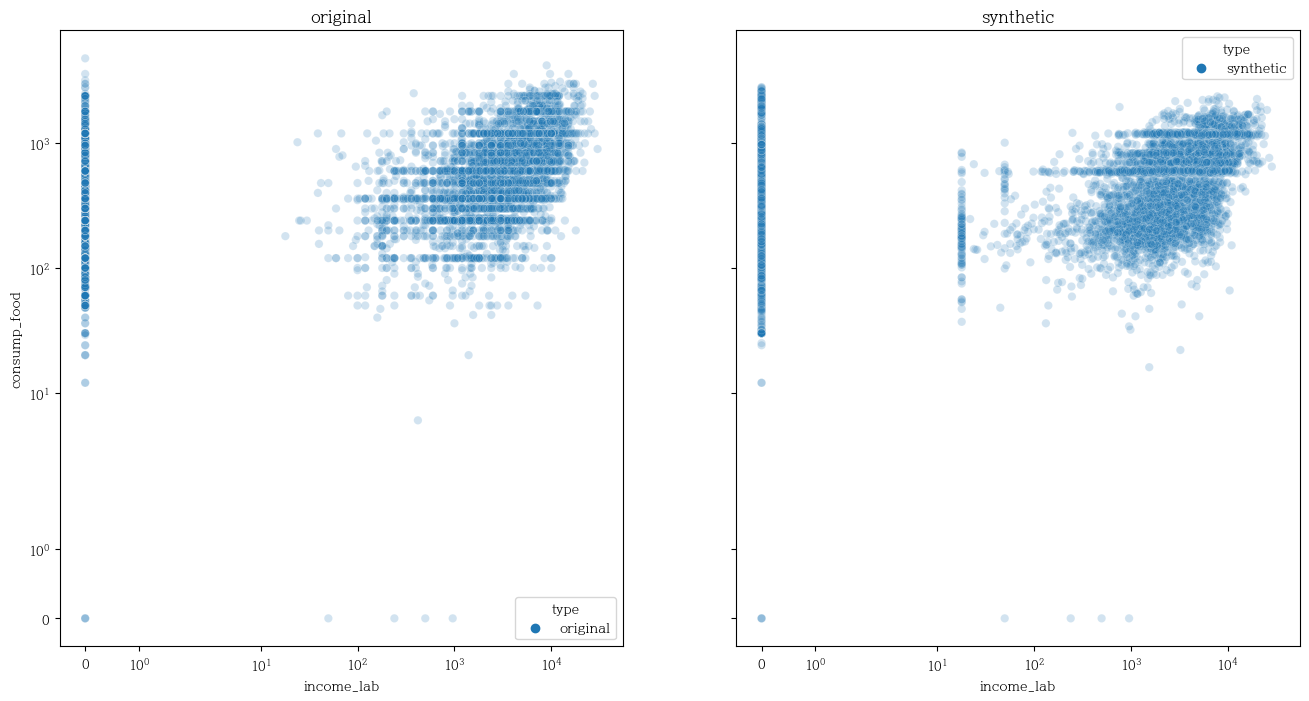

In [10]:
a = final_data.copy()
b = scenario2_less_zero.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[0],train_vars[1],  'type', ['original','synthetic'], train_vars[0],train_vars[1], 'Scenario2_1.png')

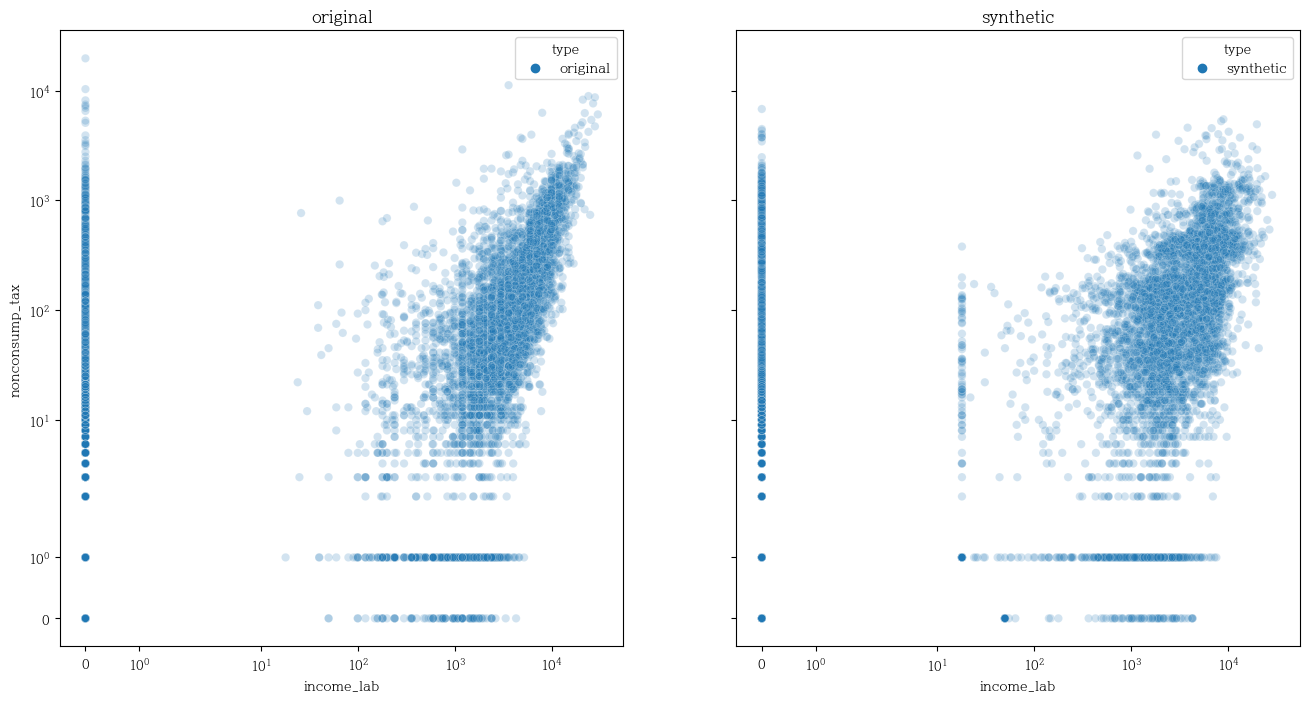

In [11]:
a = final_data.copy()
b = scenario2_less_zero.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[0],train_vars[2],  'type', ['original','synthetic'], train_vars[0],train_vars[2], 'Scenario2_2.png')

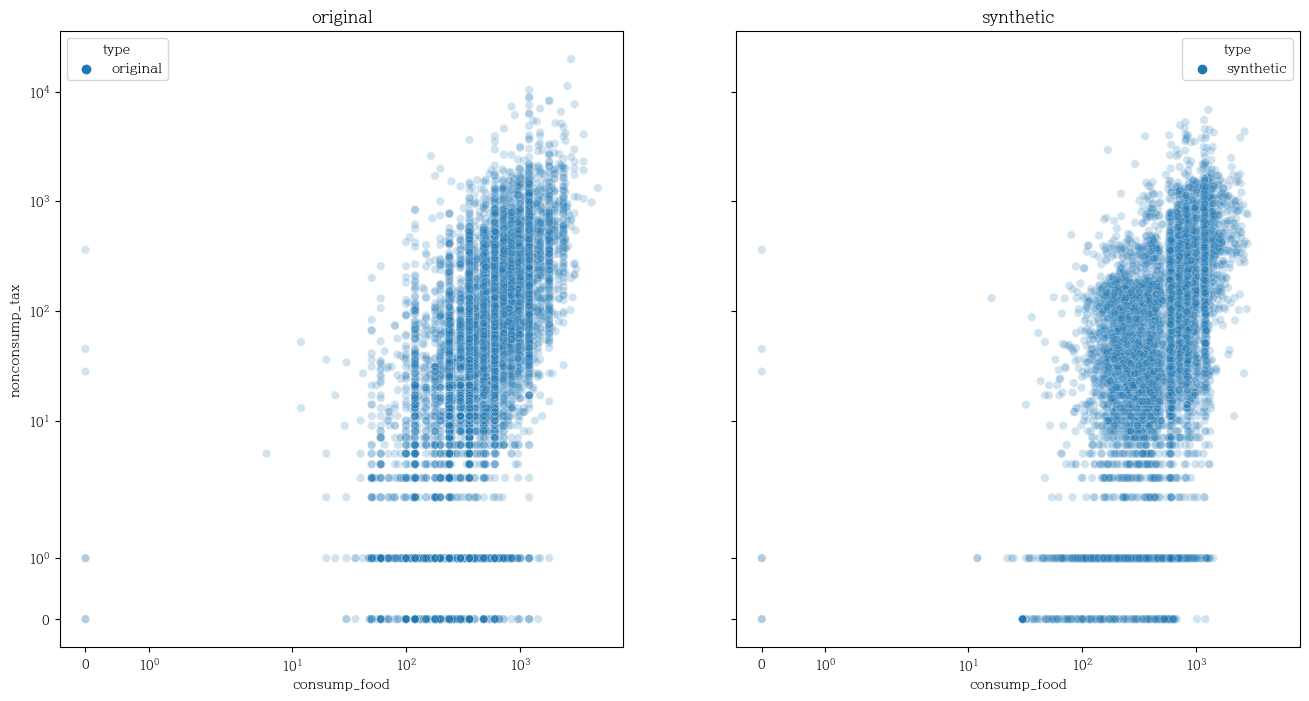

In [12]:
a = final_data.copy()
b = scenario2_less_zero.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[1],train_vars[2],  'type', ['original','synthetic'], train_vars[1],train_vars[2], 'Scenario2_3.png')

## 시나리오3

### 검정통계량 및 측도

In [62]:
fo.statistic(final_data , scenario3_less_zero , 'income_lab' , percent)[0]

,original_statistic,synthetic_statistic,bias_statistic,relative_bias_statistic
mean,2920.230516,3276.933824,356.703309,12.214902
std,3454.615789,3866.488286,411.872497,11.922382
min,0.000000,0.000000,0.000000,0.000000
20%,0.000000,0.000000,0.000000,0.000000
50%,1920.000000,1964.000000,44.000000,2.291667
80%,5359.800000,6766.200000,1406.400000,26.239785
max,30000.000000,28852.000000,-1148.000000,-3.826667


In [63]:
fo.statistic(final_data , scenario3_less_zero, 'consump_food' , percent)[0]

,original_statistic,synthetic_statistic,bias_statistic,relative_bias_statistic
mean,638.171925,649.348686,11.176762,1.751372
std,474.502763,495.823453,21.320690,4.493270
min,0.000000,0.000000,0.000000,0.000000
20%,240.000000,245.000000,5.000000,2.083333
50%,540.000000,535.000000,-5.000000,-0.925926
80%,960.000000,961.800000,1.800000,0.187500
max,4800.000000,2903.000000,-1897.000000,-39.520833


In [64]:
fo.statistic(final_data , scenario3_less_zero, 'nonconsump_tax' , percent)[0]

,original_statistic,synthetic_statistic,bias_statistic,relative_bias_statistic
mean,202.465648,222.733209,20.267561,10.010370
std,528.375263,438.085244,-90.290019,-17.088237
min,0.000000,0.000000,0.000000,0.000000
20%,8.000000,7.000000,-1.000000,-12.500000
50%,61.000000,57.000000,-4.000000,-6.557377
80%,254.000000,313.000000,59.000000,23.228346
max,19760.000000,3333.000000,-16427.000000,-83.132591


In [39]:
fo.one_variable_discrete_tabular(final_data , scenario3_less_zero , 'income_lab' , 'consump_food' , 'nonconsump_tax')

,KSComplement,RangeCoverage,BoundaryAdherence,MSE,MAE
income_lab,0.913048,0.961733,1.0,2.777294e+07,3835.698586
consump_food,0.922392,0.604792,1.0,4.751443e+05,514.096401
nonconsump_tax,0.950423,0.168674,1.0,5.175462e+05,319.979649


In [40]:
fo.multiple_variable_discrete_tabular(final_data , scenario3_less_zero , 'income_lab' , 'consump_food' , 'nonconsump_tax')

,KLDS,CorrelationSimilarity
income_lab & consump_food,0.925713,0.975614
income_lab & nonconsump_tax,0.942613,0.995908
consump_food & nonconsump_tax,0.958909,0.972295


In [80]:
final_data[['income_lab' , 'consump_food' , 'nonconsump_tax']].corr()

,income_lab,consump_food,nonconsump_tax
income_lab,1.000000,0.464664,0.451338
consump_food,0.464664,1.000000,0.392293
nonconsump_tax,0.451338,0.392293,1.000000


In [35]:
scenario3_less_zero[['income_lab' , 'consump_food' , 'nonconsump_tax']].corr(method = 'pearson')

,income_lab,consump_food,nonconsump_tax
income_lab,1.000000,0.513435,0.443154
consump_food,0.513435,1.000000,0.447704
nonconsump_tax,0.443154,0.447704,1.000000


In [94]:
linear_final = final_data[['sex' ,'edu','income_lab' , 'consump_food' , 'nonconsump_tax']] 

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 전처리: 범주형 변수 처리
categorical_columns = ['sex', 'edu']
label_encoder = LabelEncoder()

for col in categorical_columns:
    linear_final[col] = label_encoder.fit_transform(linear_final[col])

# 더미 변수 생성
linear_final = pd.get_dummies(linear_final, columns=categorical_columns)

# 독립변수(X)와 종속변수(y) 분리
X = linear_final
y = final_data['income']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화 (선택적)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Intercept:", model.intercept_)
print("\nCoefficients:")
print(coefficients)

Intercept: 4648.864229765013

Coefficients:
           Feature  Coefficient
0       income_lab  1312.518511
1     consump_food   837.891774
2   nonconsump_tax  2111.154712
3            sex_0  -145.205417
4            sex_1   145.205417
5            edu_0    74.370517
6            edu_1    47.836493
7            edu_2   117.841895
8            edu_3    76.624221
9            edu_4  -156.191260
10           edu_5   -70.250194
11           edu_6  -181.859136


In [96]:
linear_scenario3_1 = scenario3_less_zero[['sex' ,'edu','income_lab' , 'consump_food' , 'nonconsump_tax']] 

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 전처리: 범주형 변수 처리
categorical_columns = ['sex', 'edu']
label_encoder = LabelEncoder()

for col in categorical_columns:
    linear_scenario3_1[col] = label_encoder.fit_transform(linear_scenario3_1[col])

# 더미 변수 생성
linear_scenario3_1 = pd.get_dummies(linear_scenario3_1, columns=categorical_columns)

# 독립변수(X)와 종속변수(y) 분리
X = linear_scenario3_1
y = scenario3_less_zero['income']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화 (선택적)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Intercept:", model.intercept_)
print("\nCoefficients:")
print(coefficients)

Intercept: 5384.5188951491

Coefficients:
           Feature  Coefficient
0       income_lab   729.657947
1     consump_food  1539.366216
2   nonconsump_tax  1236.698476
3            sex_0  -330.700033
4            sex_1   330.700033
5            edu_0   178.871122
6            edu_1   -36.207266
7            edu_2   323.483382
8            edu_3   -81.438004
9            edu_4  -191.724981
10           edu_5  -237.082522
11           edu_6  -260.433406


### 산점도

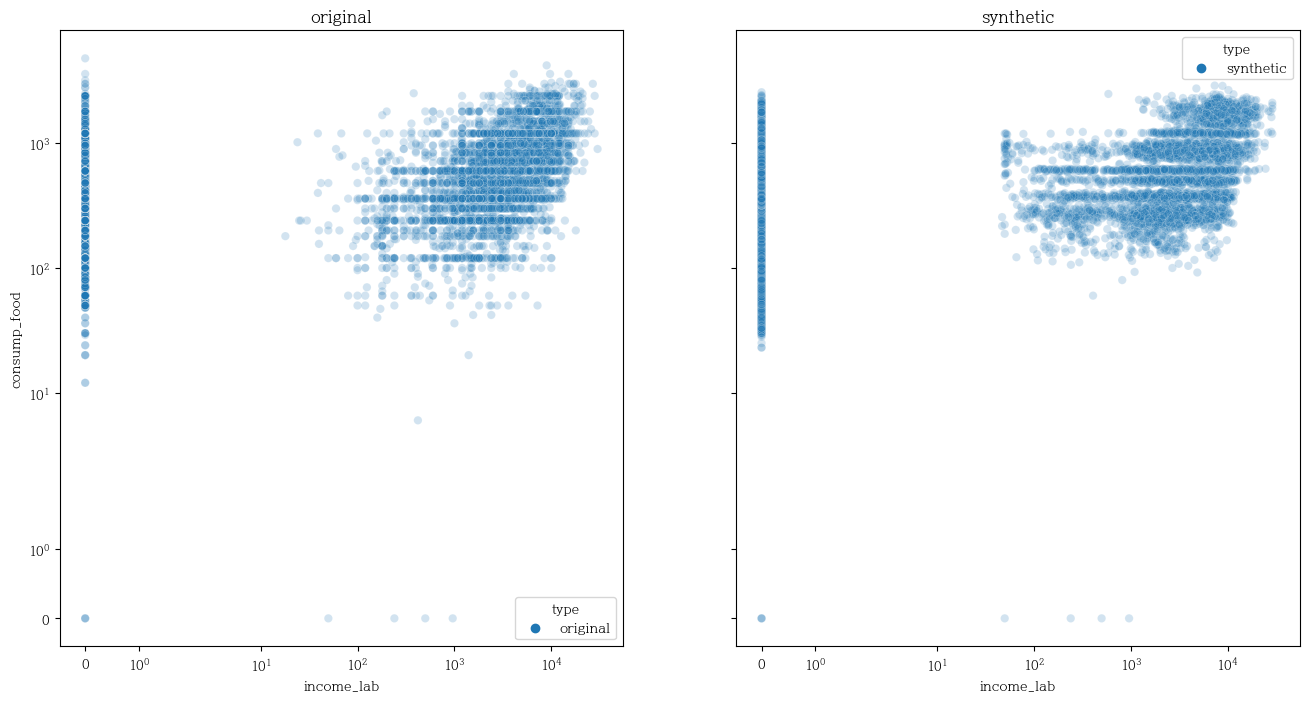

In [16]:
a = final_data.copy()
b = scenario3_less_zero.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[0],train_vars[1],  'type', ['original','synthetic'], train_vars[0],train_vars[1], 'Scenario3.1_1.png')

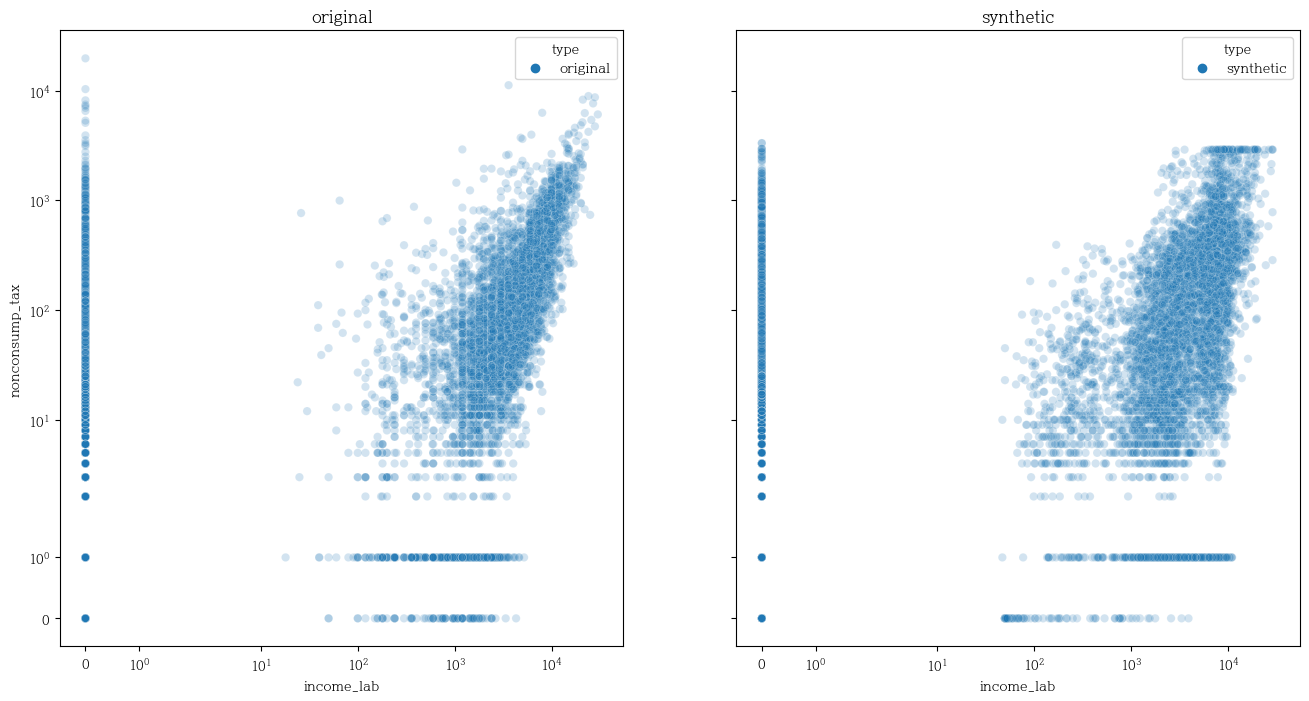

In [17]:
a = final_data.copy()
b = scenario3_less_zero.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[0],train_vars[2],  'type', ['original','synthetic'], train_vars[0],train_vars[2], 'Scenario3.1_2.png')

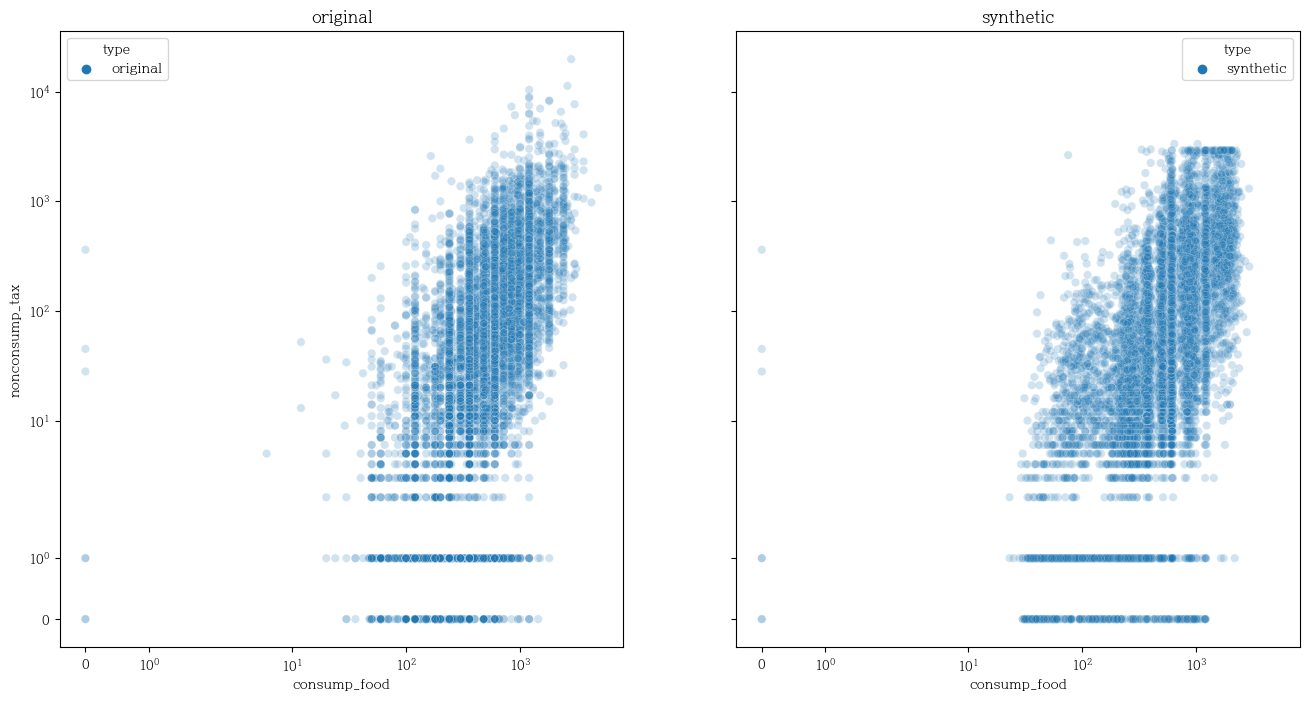

In [18]:
a = final_data.copy()
b = scenario3_less_zero.copy()
a['type'] = 'original'
b['type'] = 'synthetic'
comb_data  = pd.concat([a, b], ignore_index=True, axis=0)

train_vars = ["income_lab" , "consump_food" , "nonconsump_tax"]

myfunc.scatter_by_group_sns_side_symlog(comb_data, train_vars[1],train_vars[2],  'type', ['original','synthetic'], train_vars[1],train_vars[2], 'Scenario3.1_3.png')